In [15]:
import cv2
import numpy as np
from PIL import Image

from torchvision import transforms
import matplotlib.pyplot as plt

In [18]:
def disparity_normalization(disp): # disp is an array in uint8 data type
    # disp_norm = cv2.normalize(src=disp, dst= disp, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)
    _min = np.amin(disp)
    _max = np.amax(disp)
    #disp_norm = disp - _min * 255.0 / (_max - _min)
    disp_norm = (disp - _min) * 255.0 / (_max - _min)
    disp_norm = np.uint8(disp_norm)
    plt.imshow(disp_norm)
    plt.show()

    return disp_norm 

4


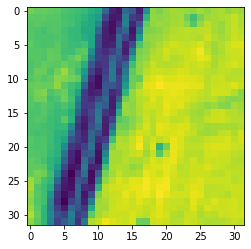

In [101]:
from osgeo import gdal, osr
image_path = "/home/popryho/explosion-crater-detection/dataset/train_02/images/00003.tif"

data_set = gdal.Open(image_path)  
print(data_set.RasterCount)  
# As, there are 3 bands, we will store in 3 different variables  

band_1 = data_set.GetRasterBand(1) # red channel  
band_2 = data_set.GetRasterBand(2) # green channel  
band_3 = data_set.GetRasterBand(3) # blue channel
band_4 = data_set.GetRasterBand(4) # blue channel

b1 = band_1.ReadAsArray()  
b2 = band_2.ReadAsArray()  
b3 = band_3.ReadAsArray()
b4 = band_4.ReadAsArray()  

img_1 = np.dstack((b1, b2, b3, b4))  
f = plt.figure()  
plt.imshow(b1)  
plt.savefig('Tiff.png')  
plt.show()  

In [103]:
data_set.ReadAsArray().transpose(1, 2, 0).astype(np.int32)

array([[[2560, 1960, 1722, 3570],
        [2504, 1910, 1690, 3534],
        [2508, 1944, 1670, 3608],
        ...,
        [2622, 2244, 1862, 3956],
        [2664, 2252, 1886, 3938],
        [2642, 2228, 1854, 3934]],

       [[2490, 1906, 1694, 3484],
        [2482, 1914, 1680, 3540],
        [2488, 1912, 1666, 3544],
        ...,
        [2692, 2278, 1878, 3980],
        [2736, 2294, 1902, 3962],
        [2680, 2254, 1890, 3928]],

       [[2470, 1908, 1690, 3474],
        [2480, 1917, 1689, 3484],
        [2462, 1903, 1678, 3472],
        ...,
        [2692, 2274, 1856, 3962],
        [2732, 2302, 1896, 3980],
        [2678, 2230, 1877, 3922]],

       ...,

       [[2626, 1988, 1706, 3654],
        [2480, 1920, 1684, 3574],
        [2352, 1830, 1620, 3390],
        ...,
        [2756, 2314, 1944, 3986],
        [2766, 2322, 1938, 3998],
        [2742, 2322, 1935, 3998]],

       [[2686, 2102, 1778, 3664],
        [2510, 1940, 1713, 3566],
        [2344, 1838, 1614, 3442],
        .

In [99]:
data_set.ReadAsArray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

(16, 16, 3)


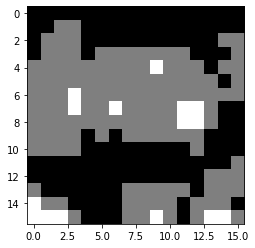

In [70]:
img = cv2.imread("/home/popryho/explosion-crater-detection/dataset/train_01/images/02122.tif")
# You may need to convert the color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
a = disparity_normalization(img)

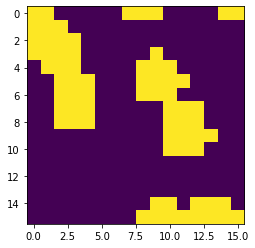

In [39]:
mask = cv2.imread("/home/popryho/explosion-crater-detection/dataset/train_01/masks/02122.tif", 0)
a = disparity_normalization(mask)

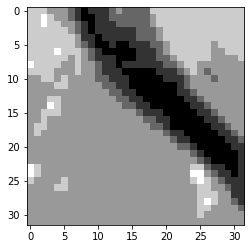

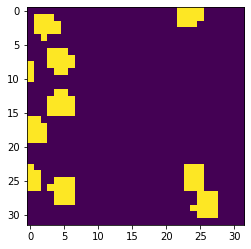

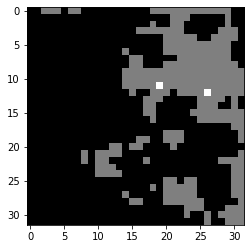

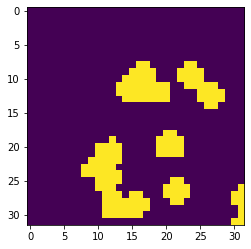

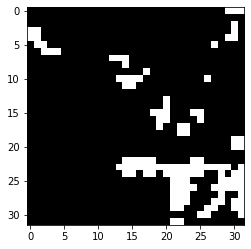

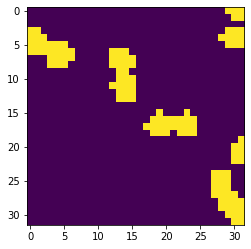

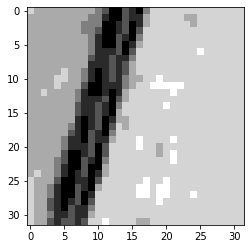

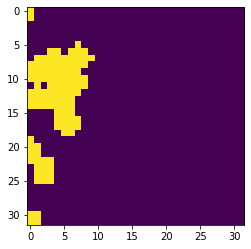

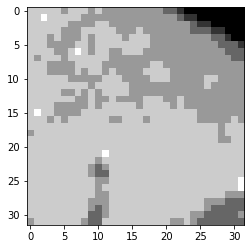

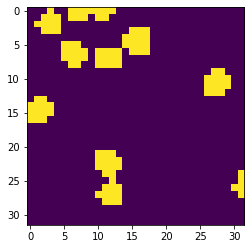

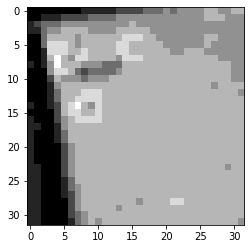

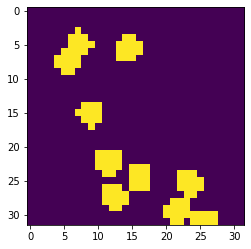

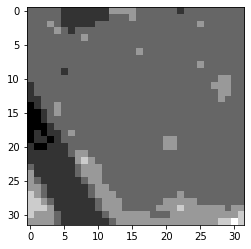

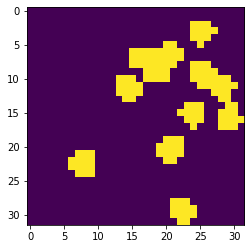

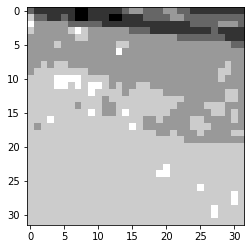

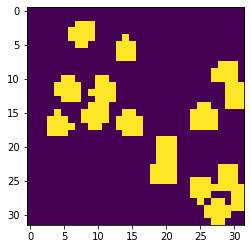

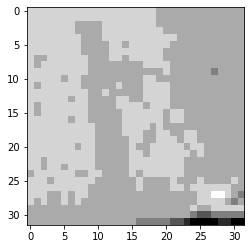

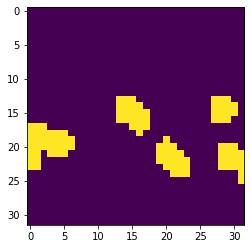

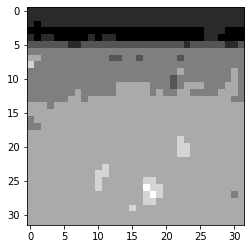

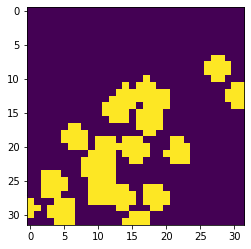

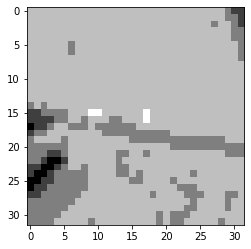

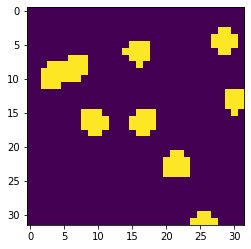

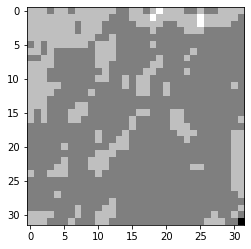

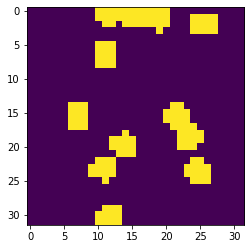

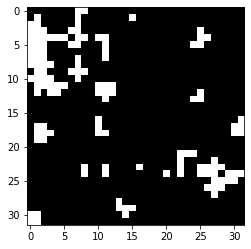

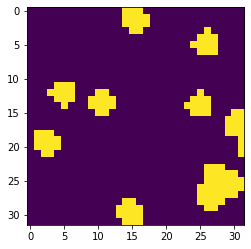

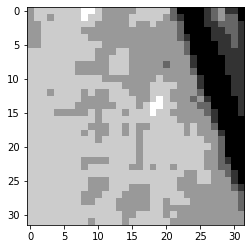

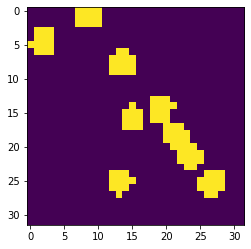

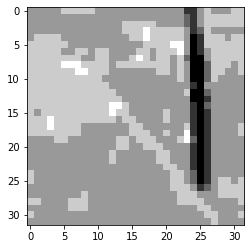

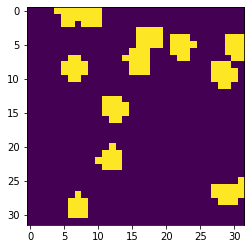

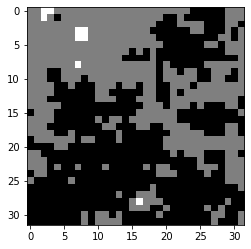

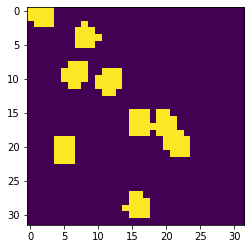

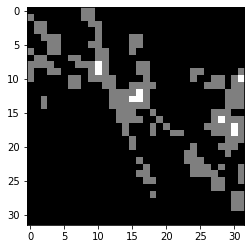

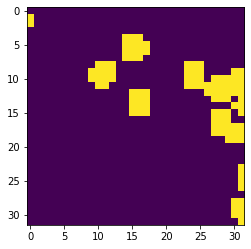

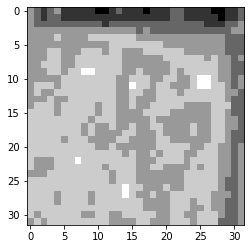

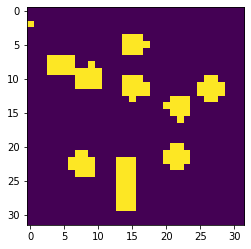

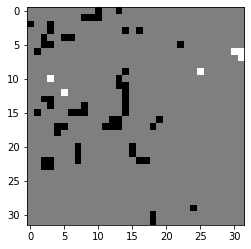

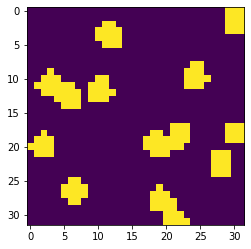

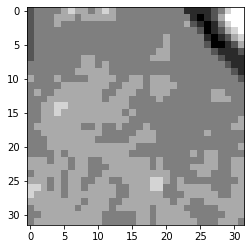

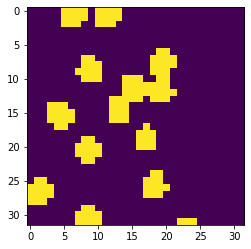

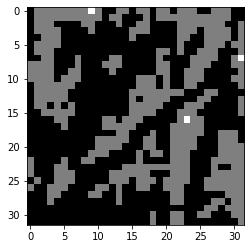

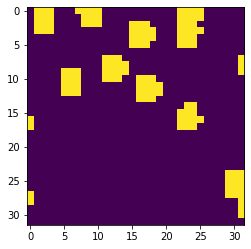

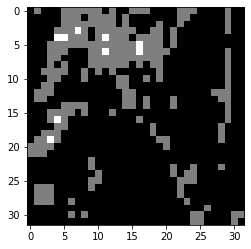

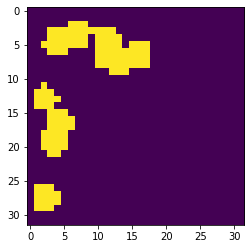

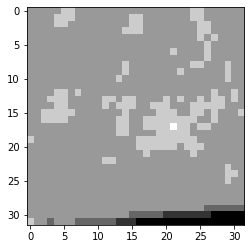

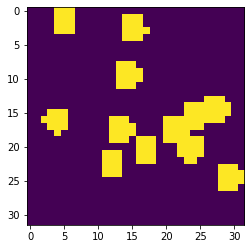

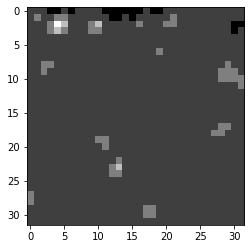

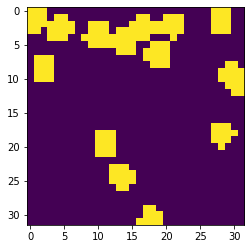

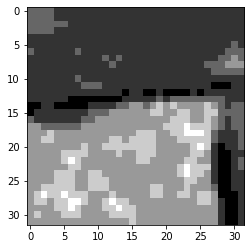

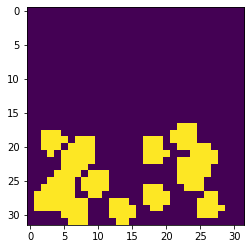

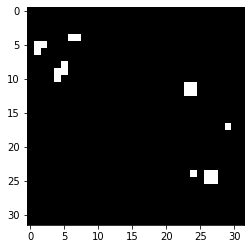

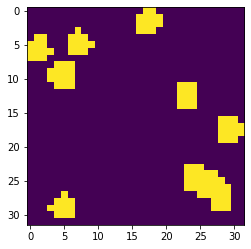

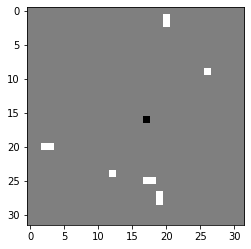

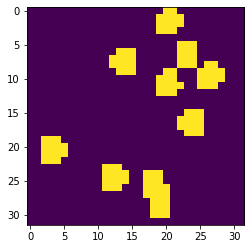

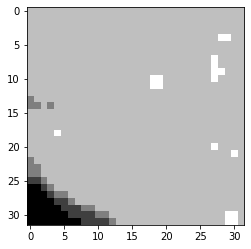

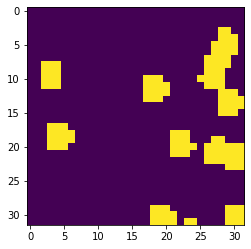

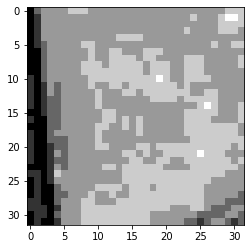

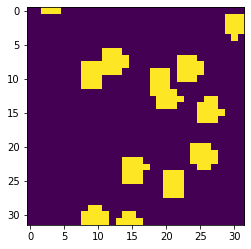

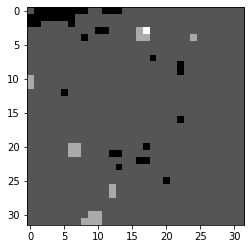

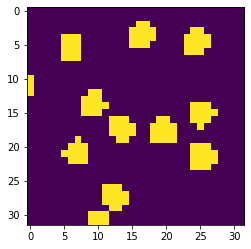

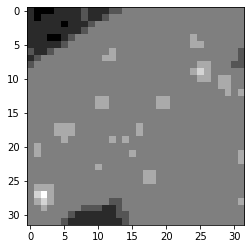

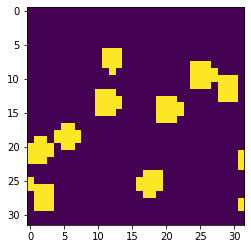

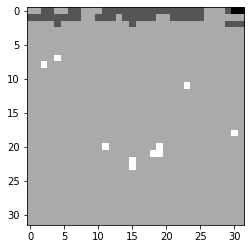

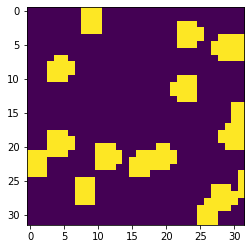

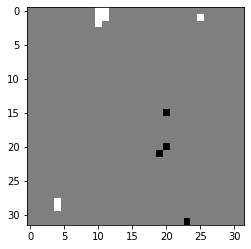

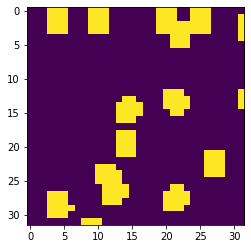

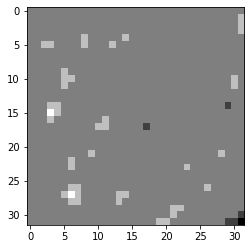

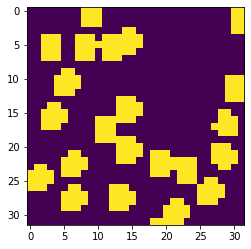

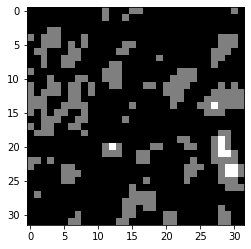

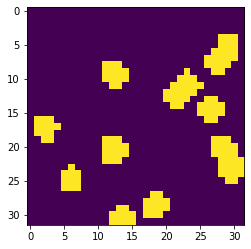

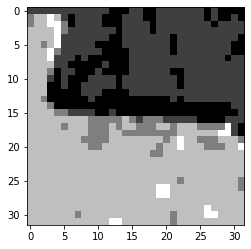

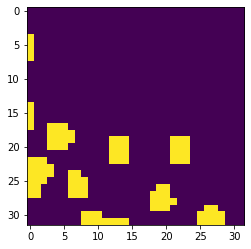

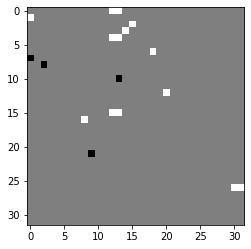

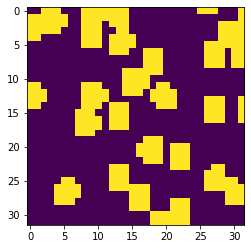

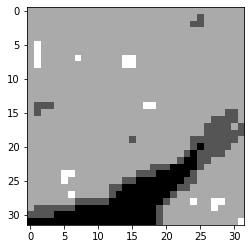

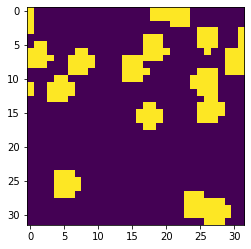

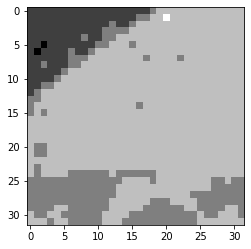

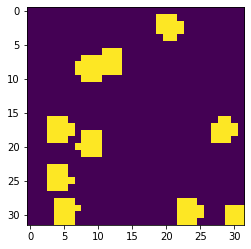

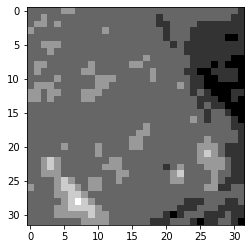

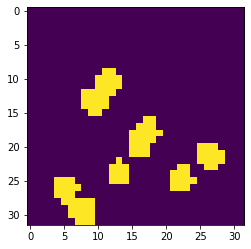

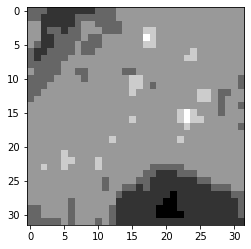

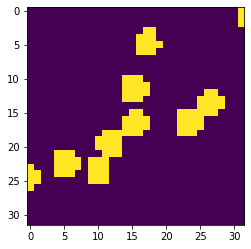

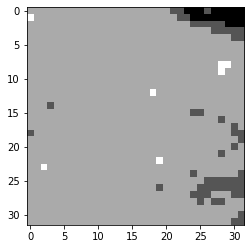

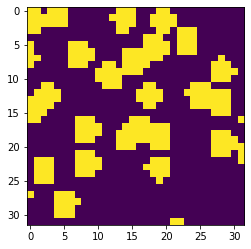

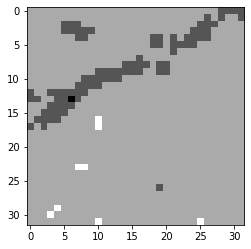

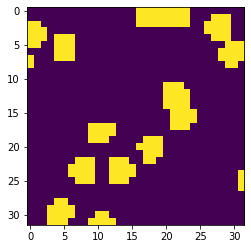

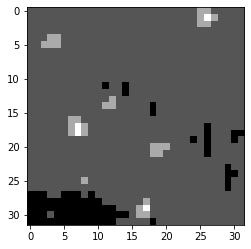

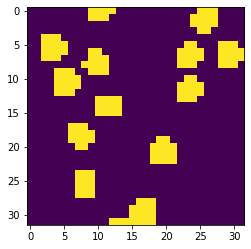

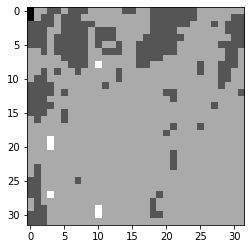

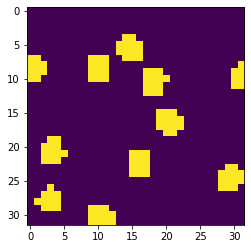

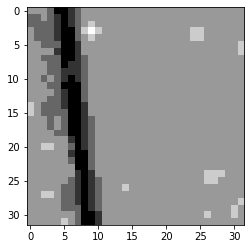

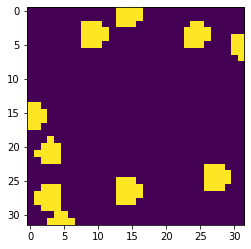

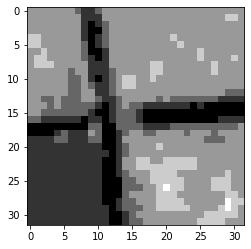

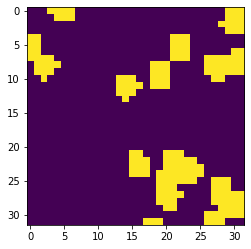

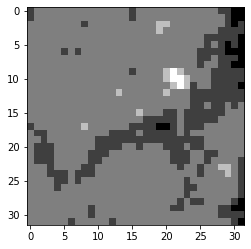

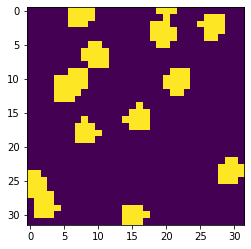

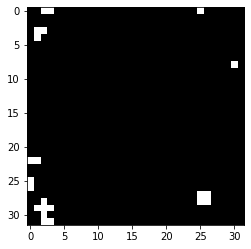

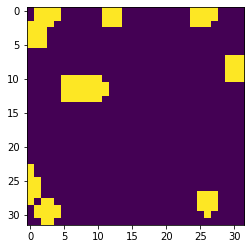

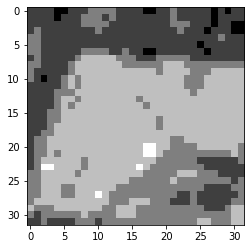

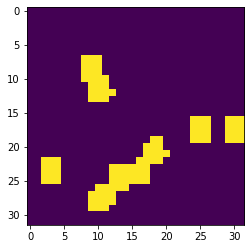

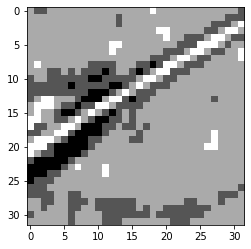

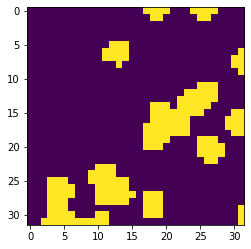

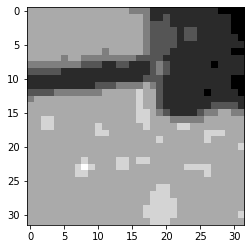

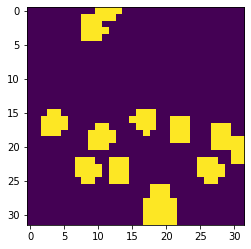

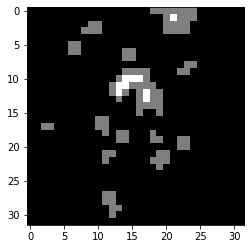

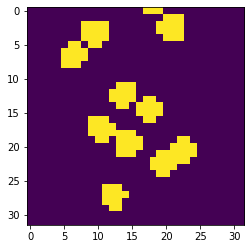

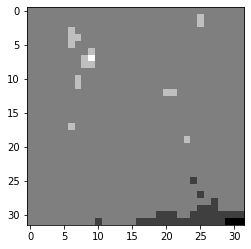

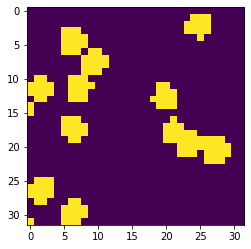

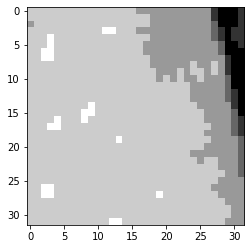

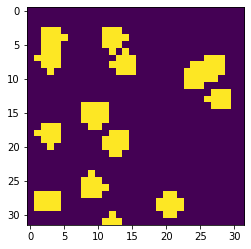

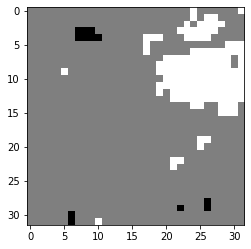

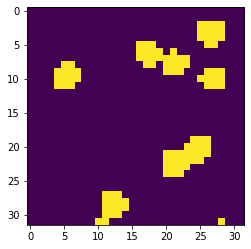

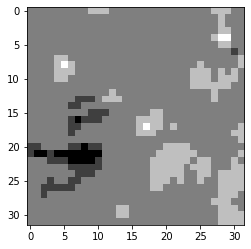

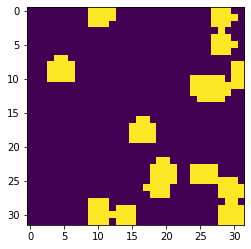

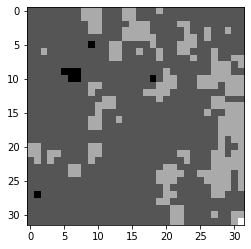

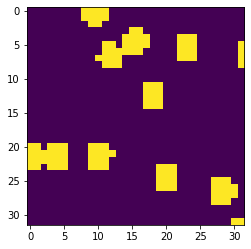

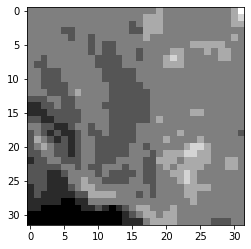

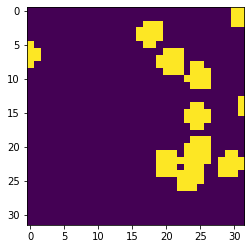

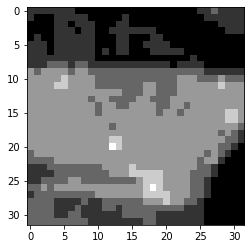

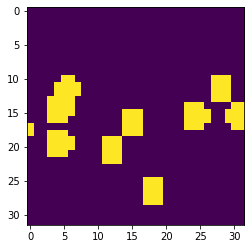

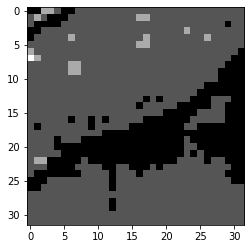

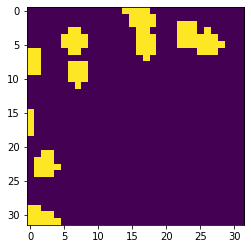

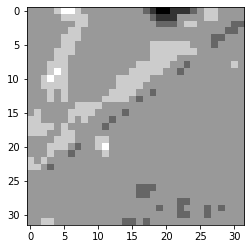

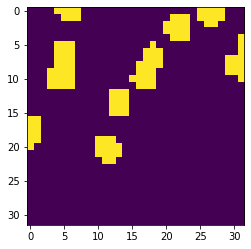

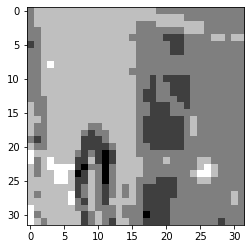

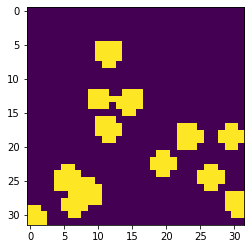

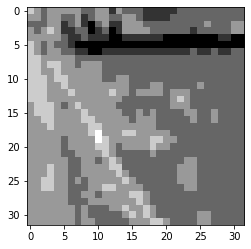

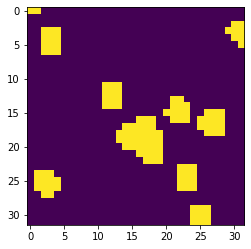

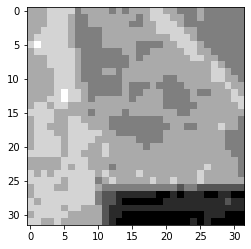

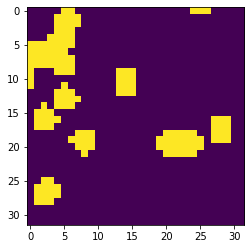

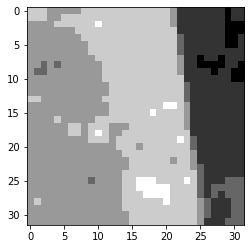

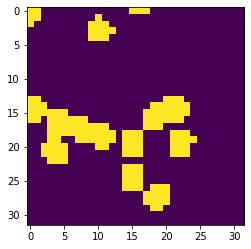

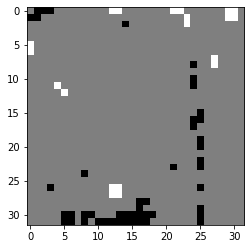

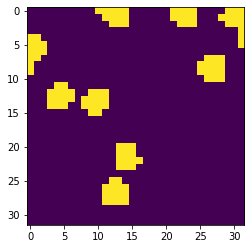

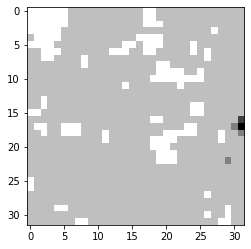

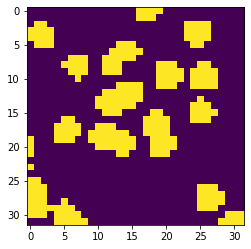

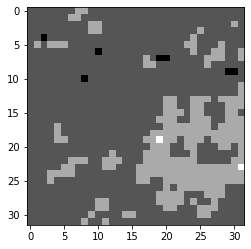

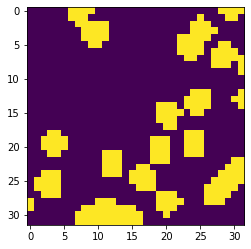

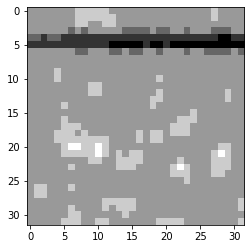

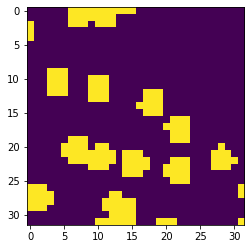

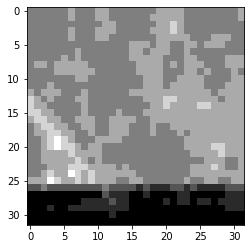

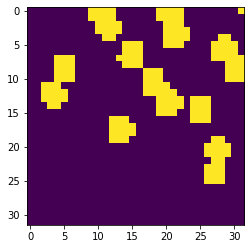

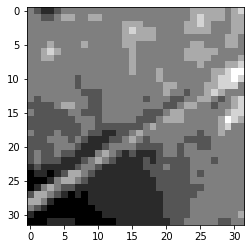

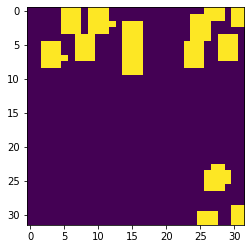

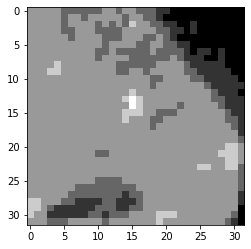

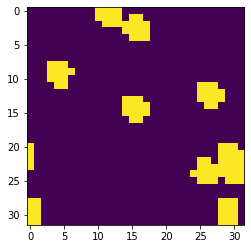

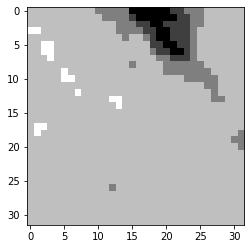

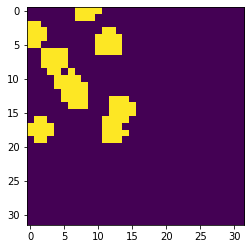

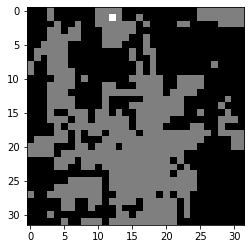

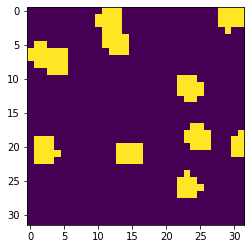

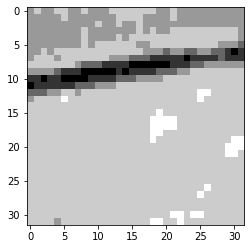

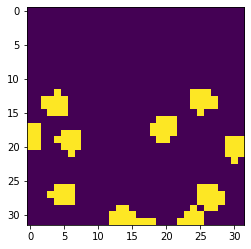

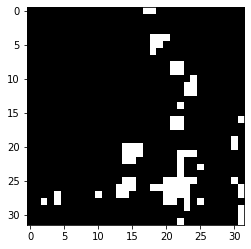

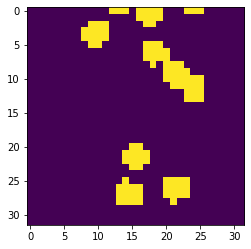

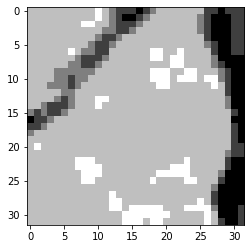

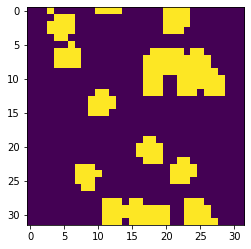

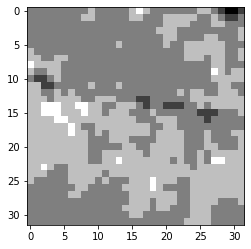

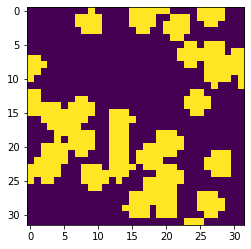

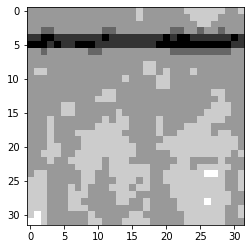

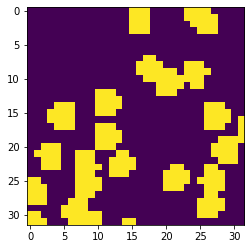

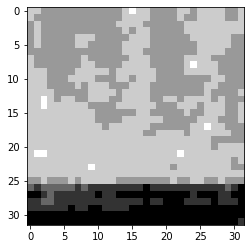

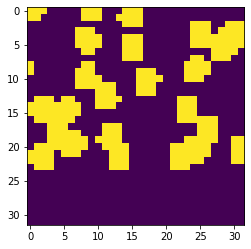

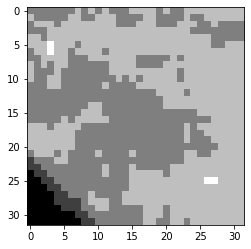

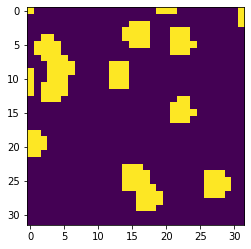

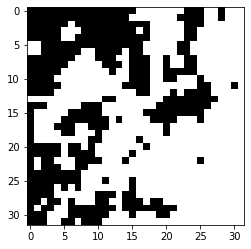

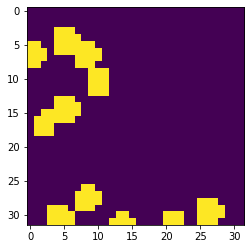

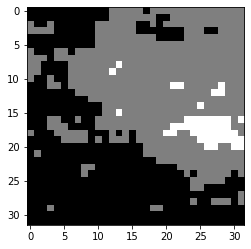

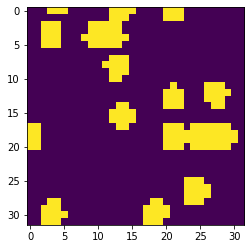

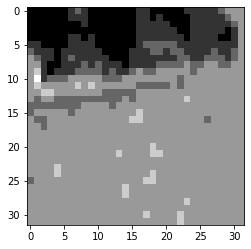

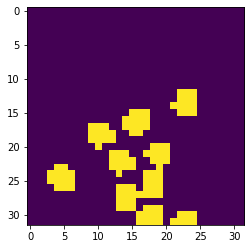

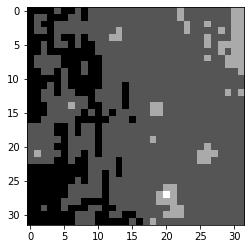

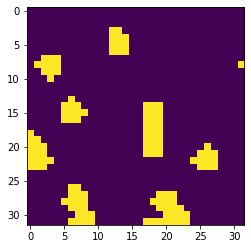

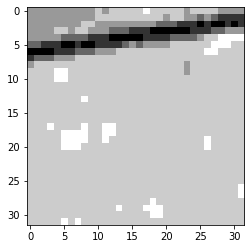

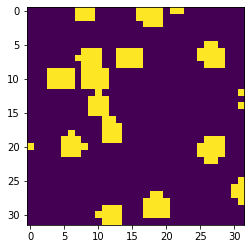

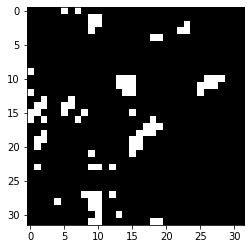

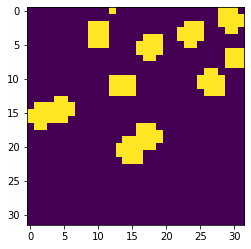

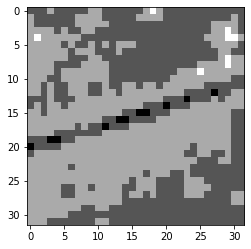

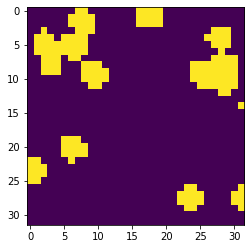

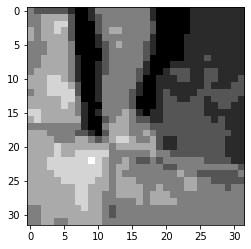

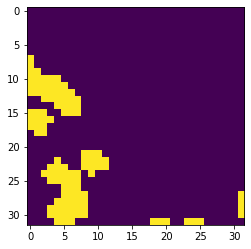

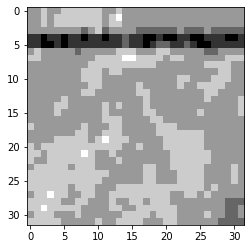

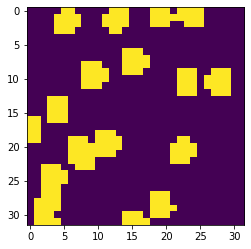

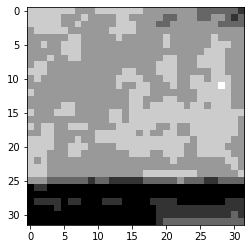

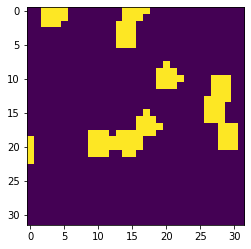

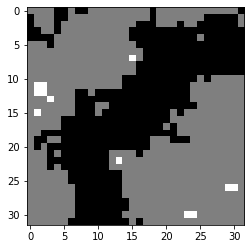

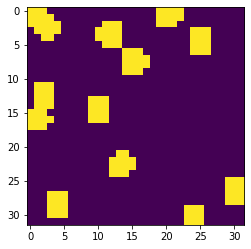

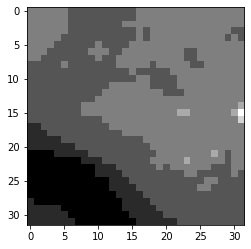

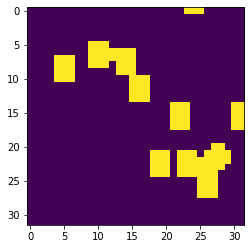

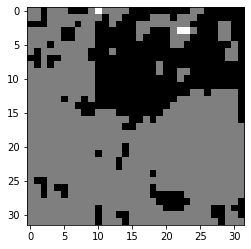

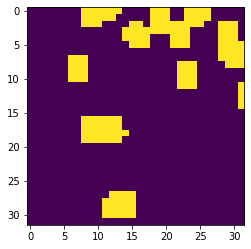

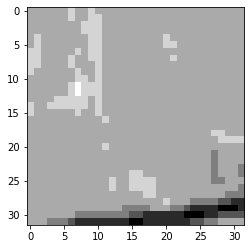

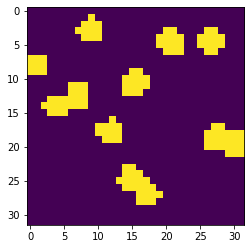

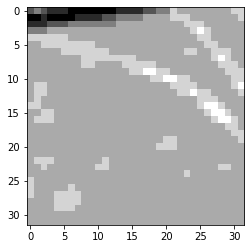

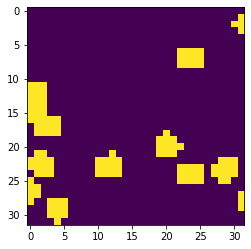

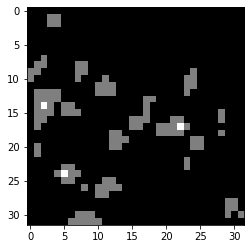

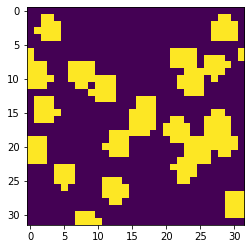

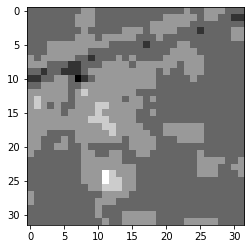

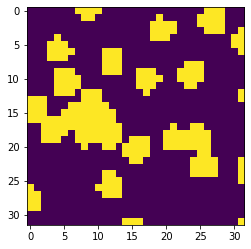

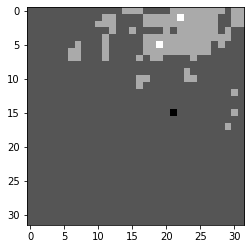

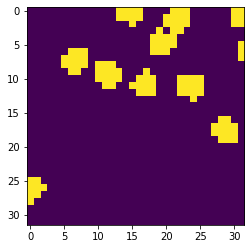

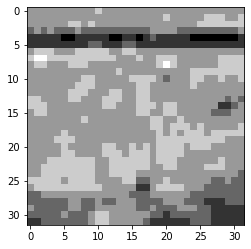

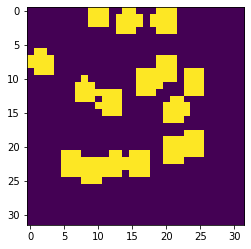

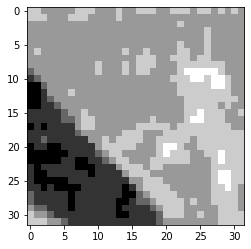

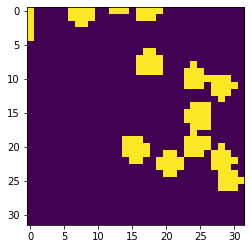

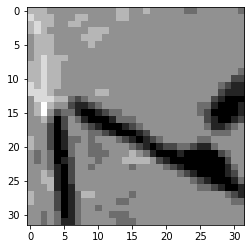

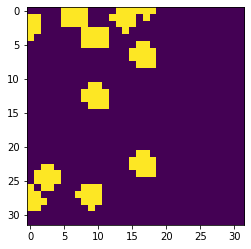

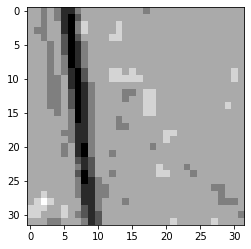

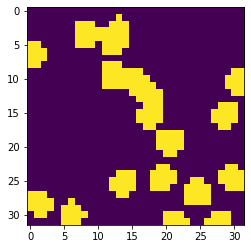

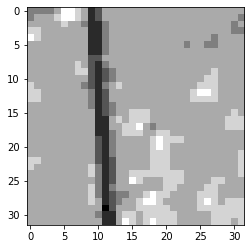

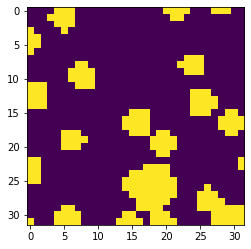

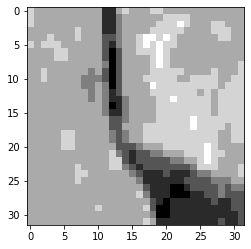

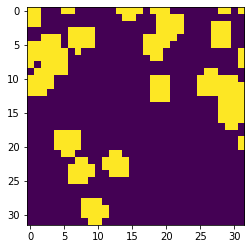

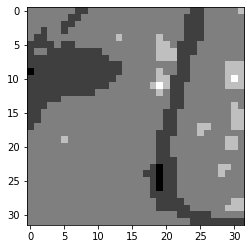

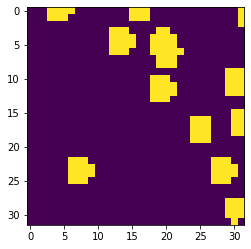

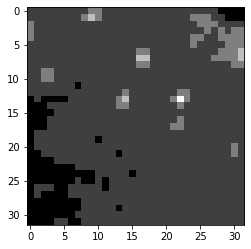

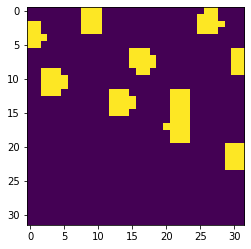

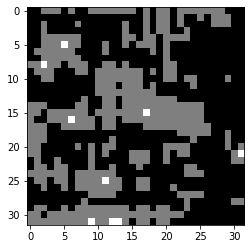

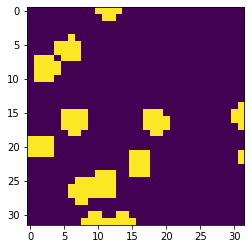

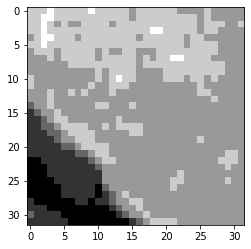

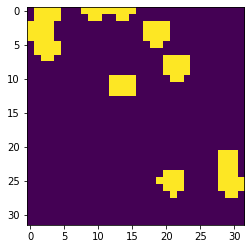

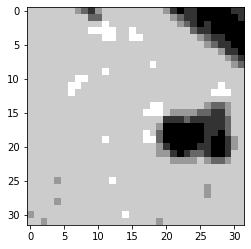

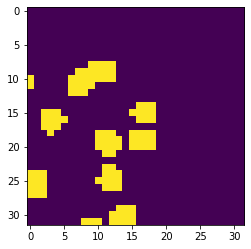

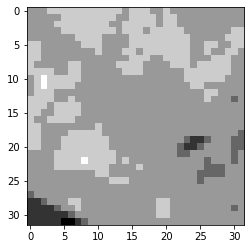

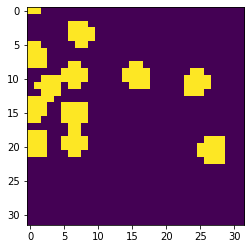

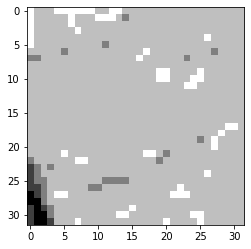

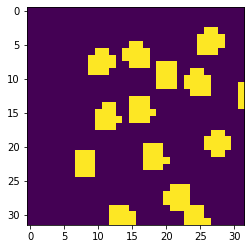

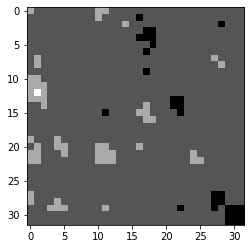

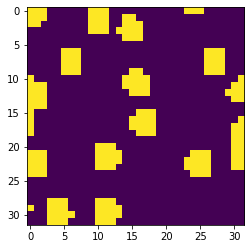

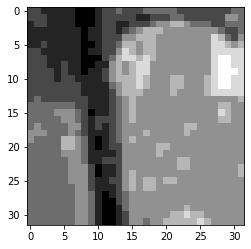

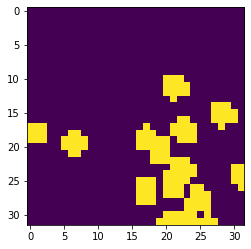

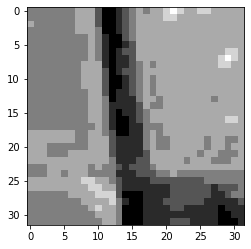

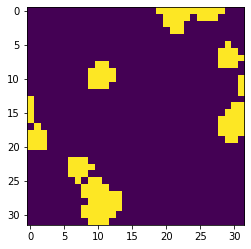

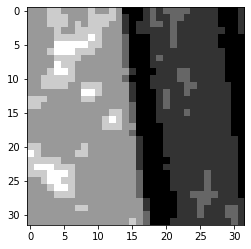

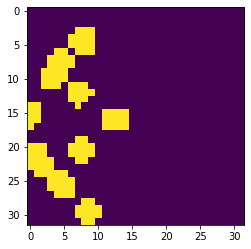

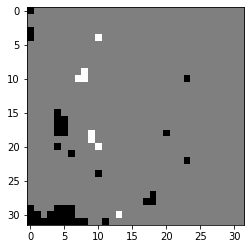

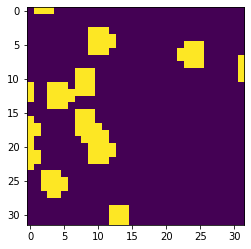

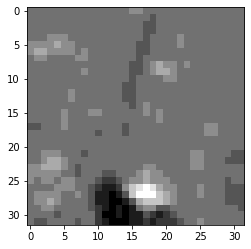

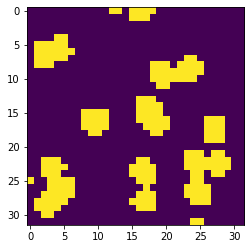

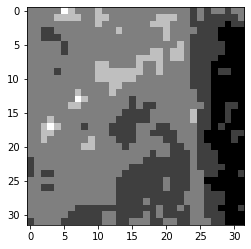

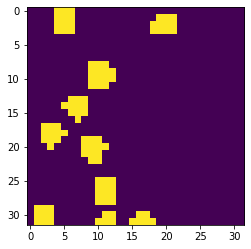

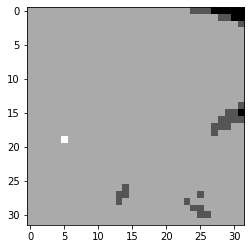

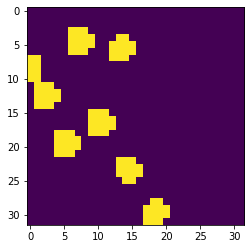

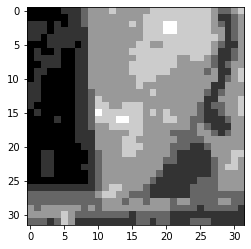

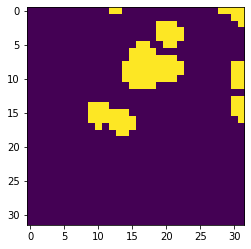

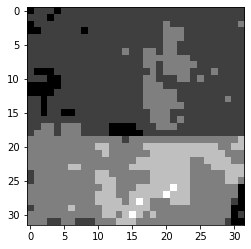

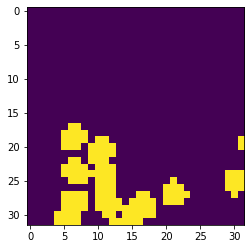

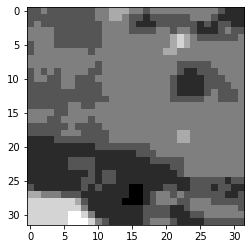

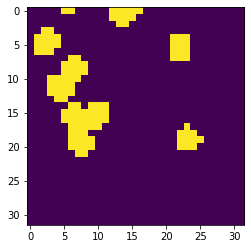

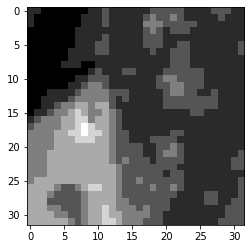

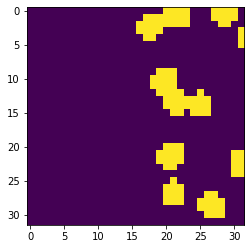

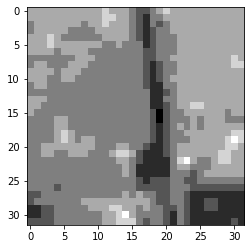

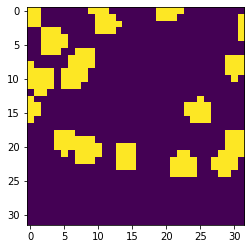

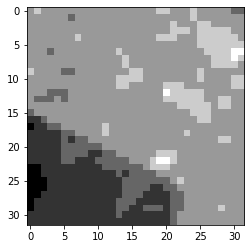

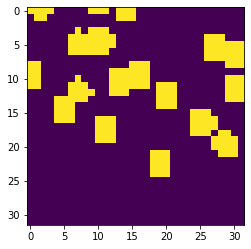

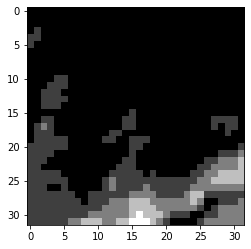

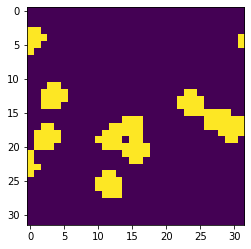

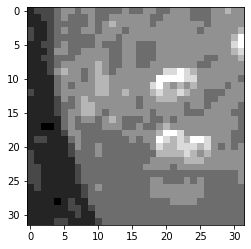

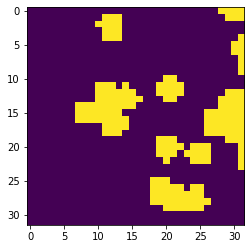

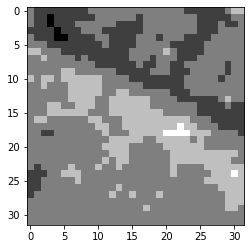

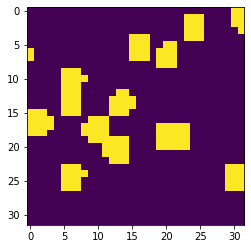

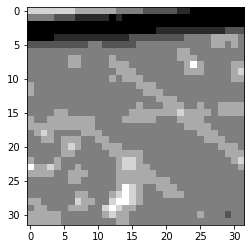

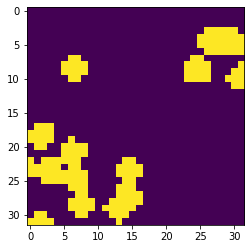

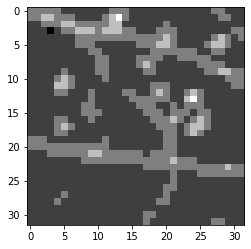

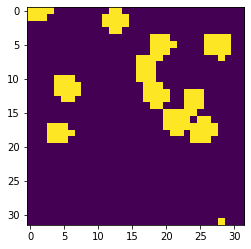

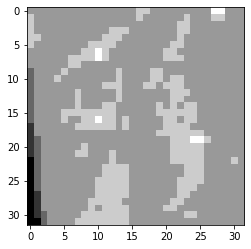

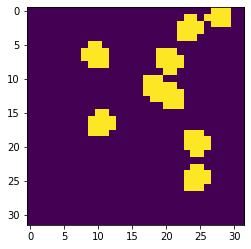

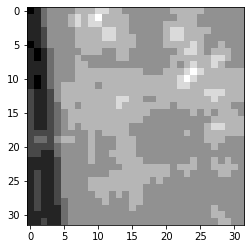

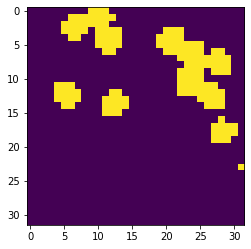

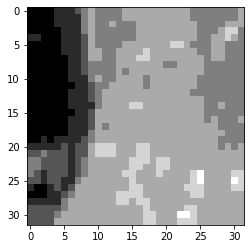

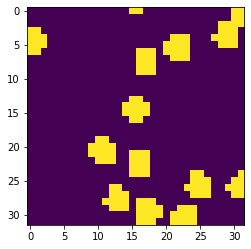

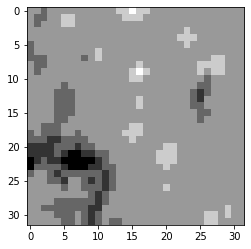

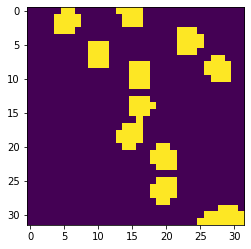

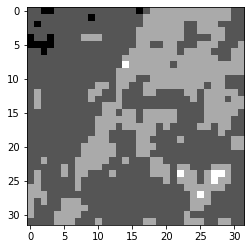

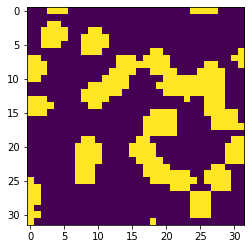

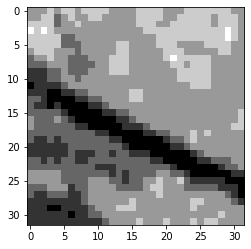

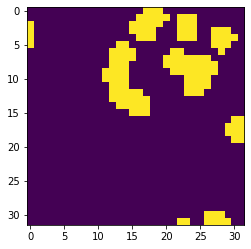

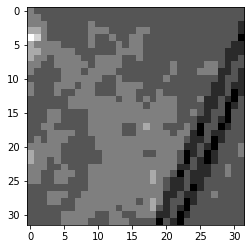

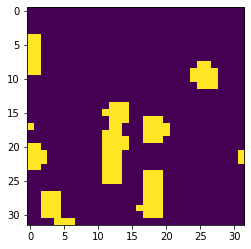

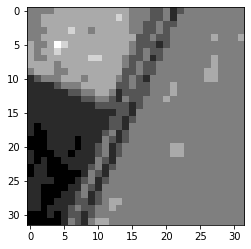

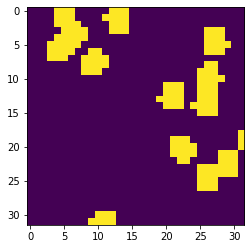

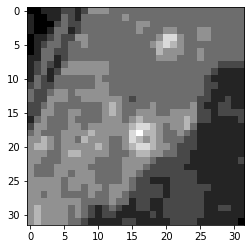

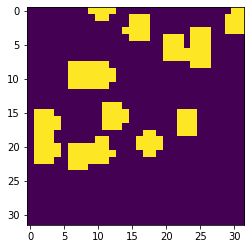

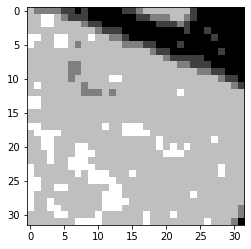

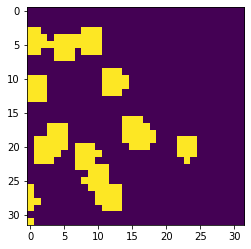

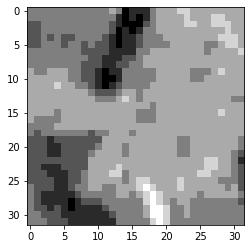

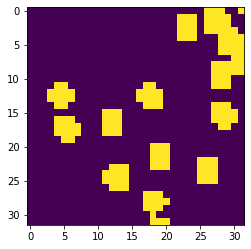

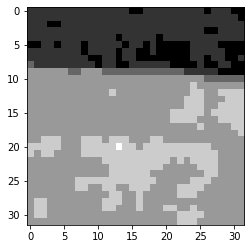

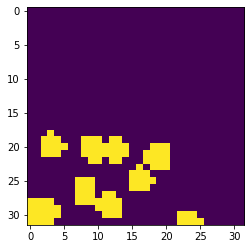

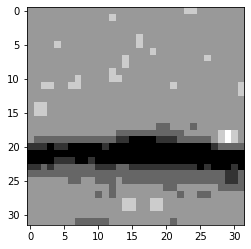

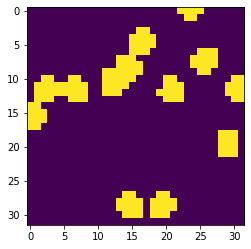

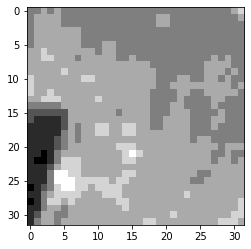

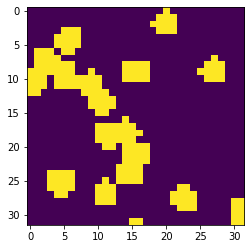

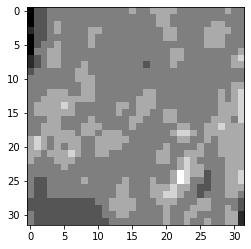

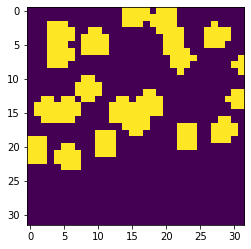

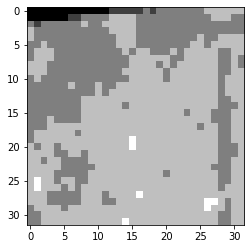

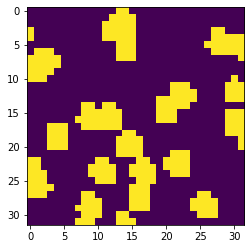

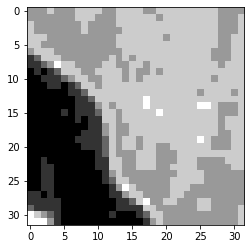

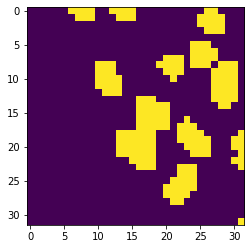

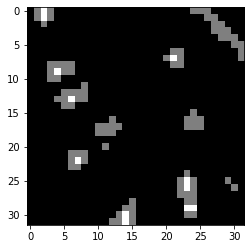

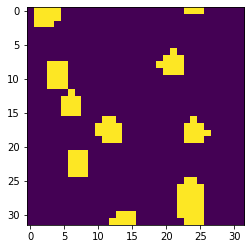

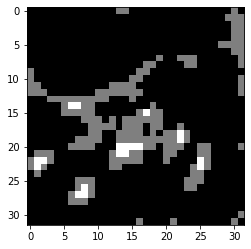

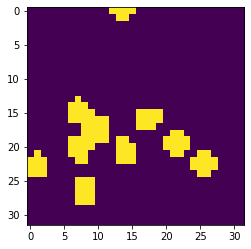

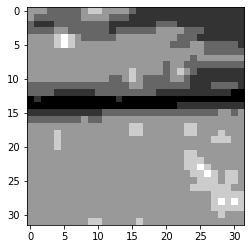

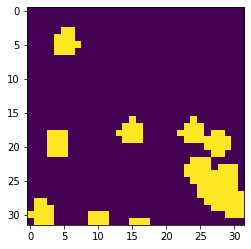

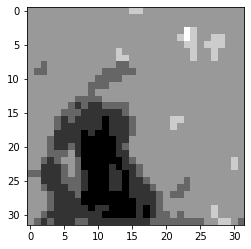

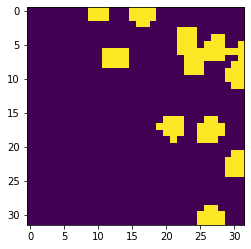

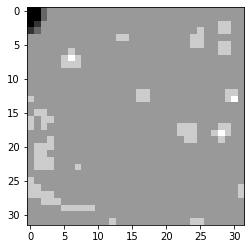

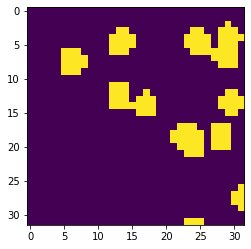

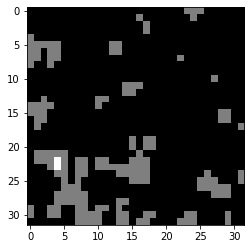

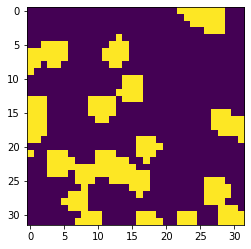

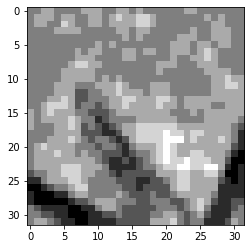

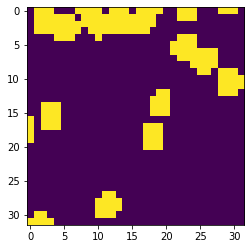

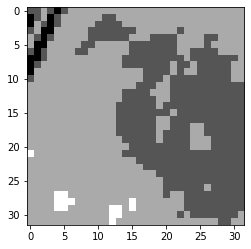

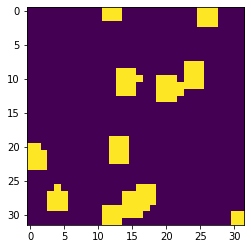

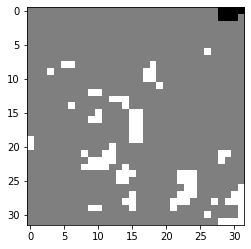

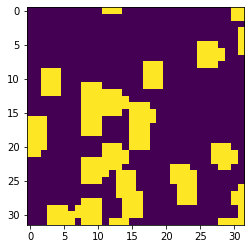

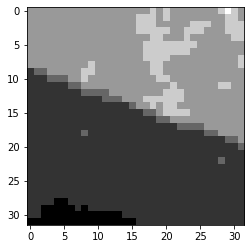

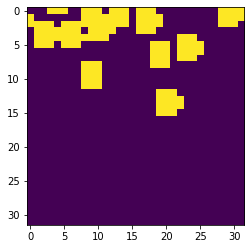

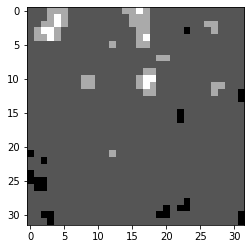

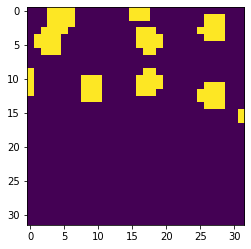

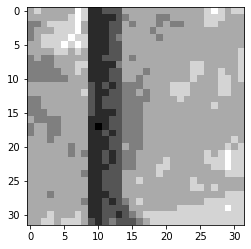

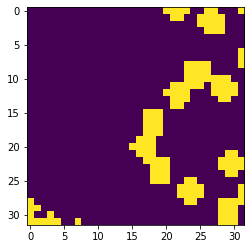

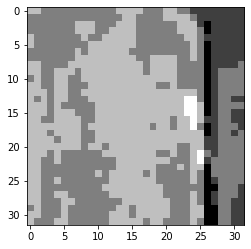

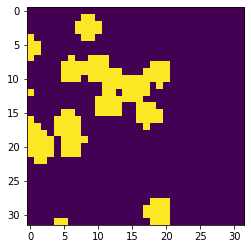

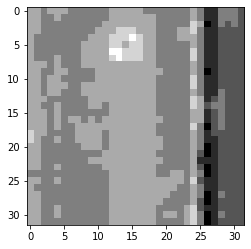

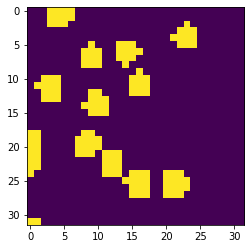

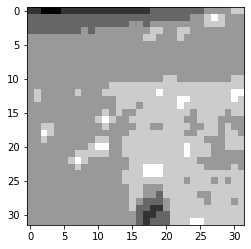

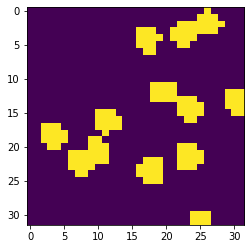

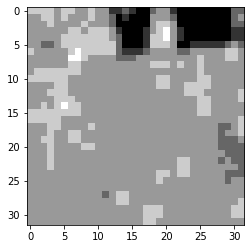

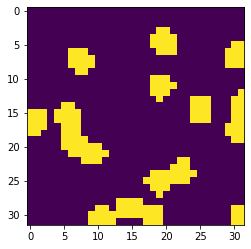

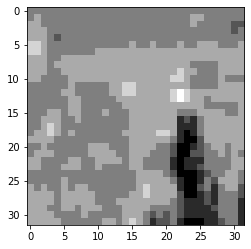

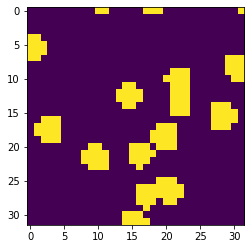

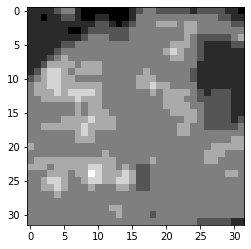

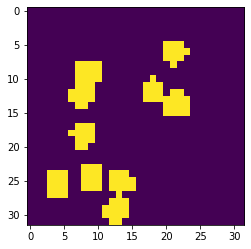

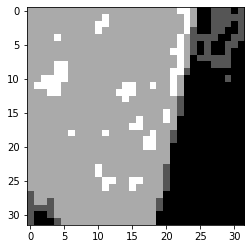

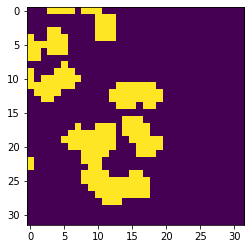

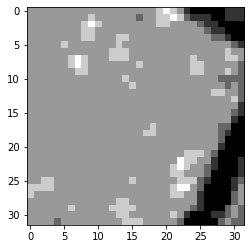

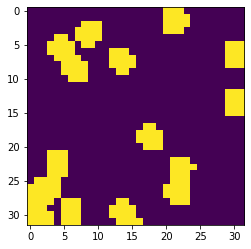

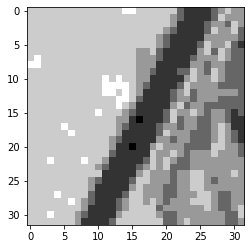

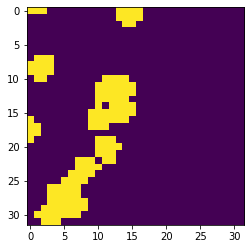

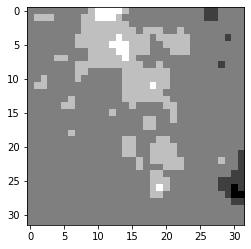

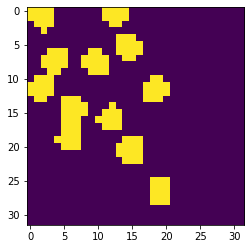

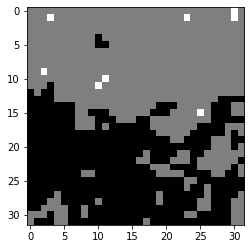

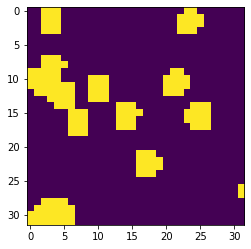

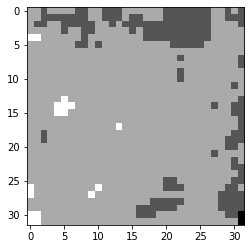

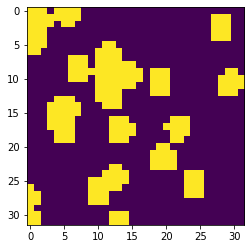

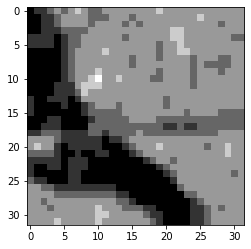

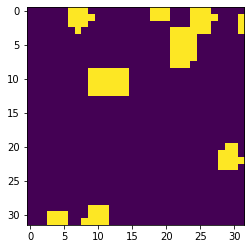

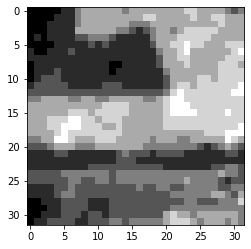

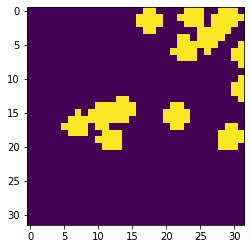

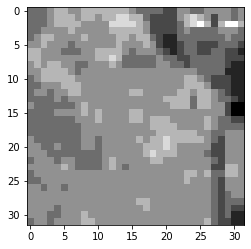

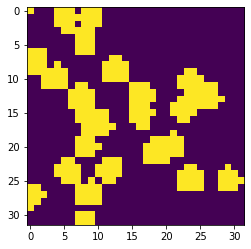

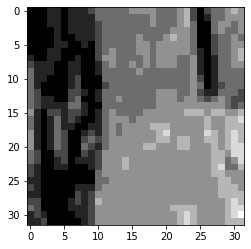

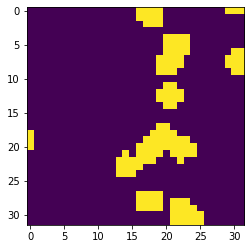

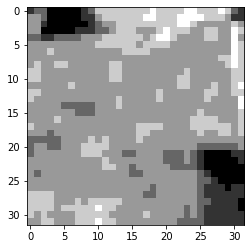

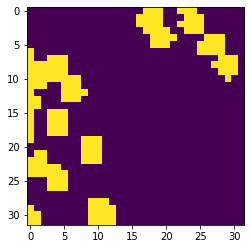

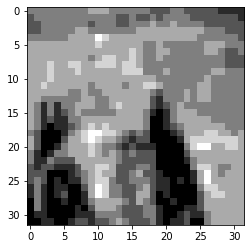

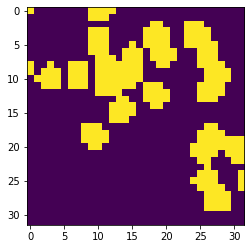

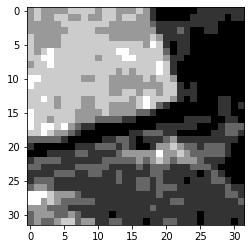

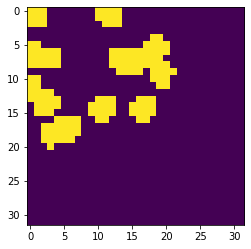

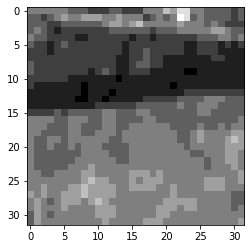

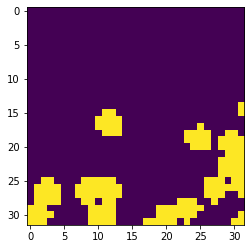

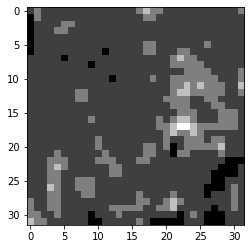

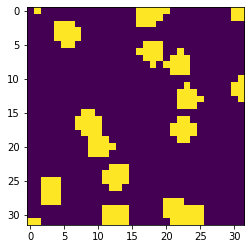

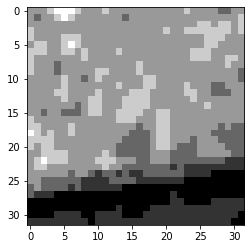

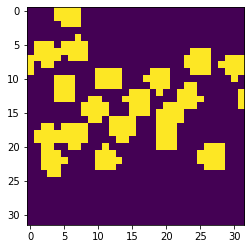

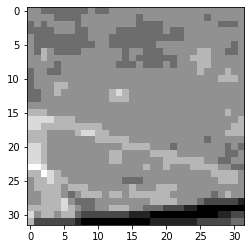

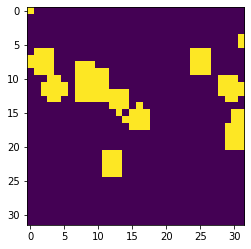

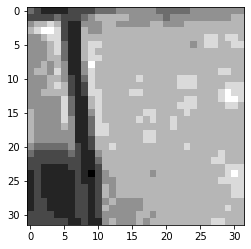

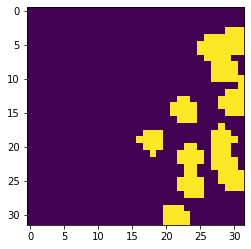

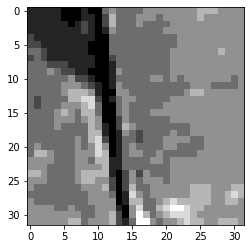

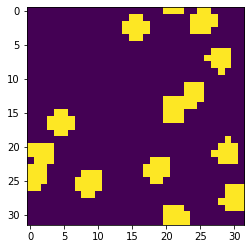

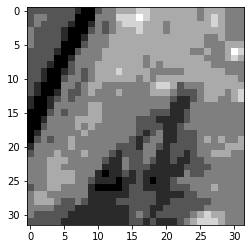

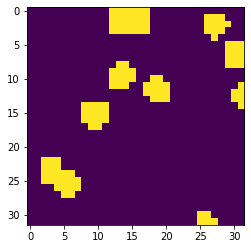

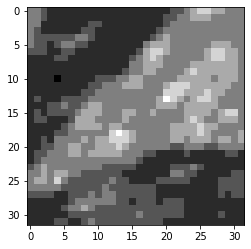

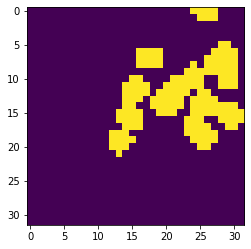

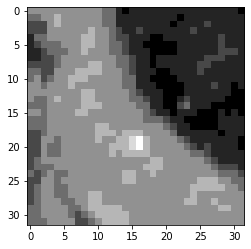

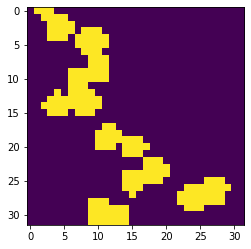

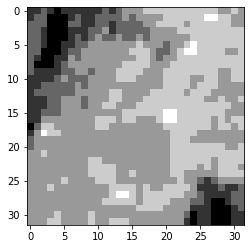

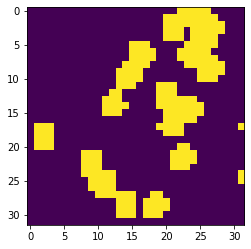

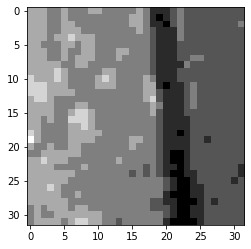

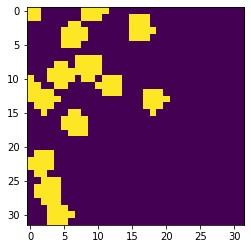

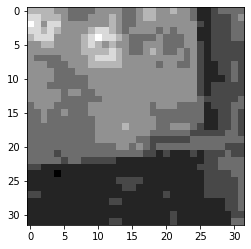

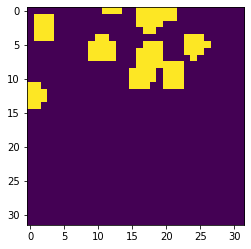

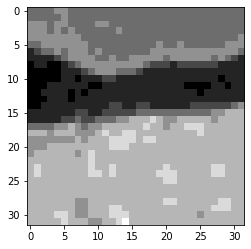

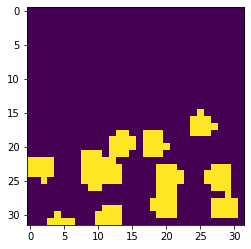

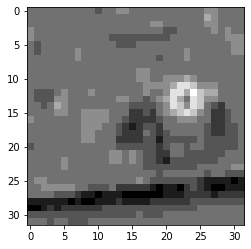

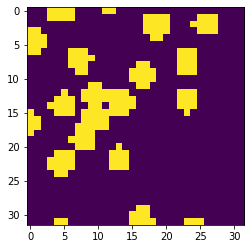

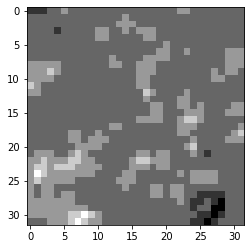

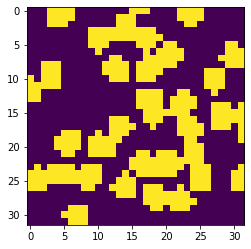

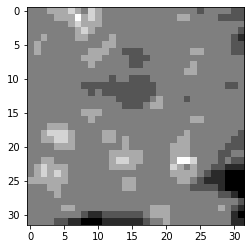

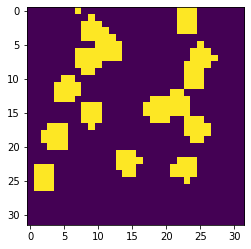

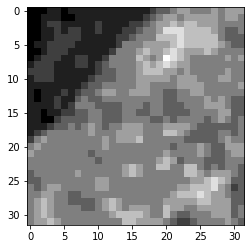

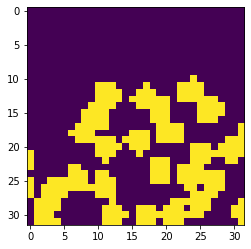

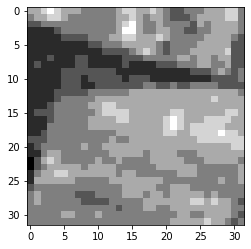

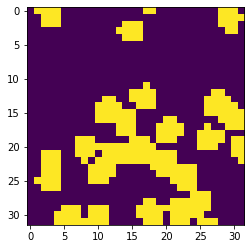

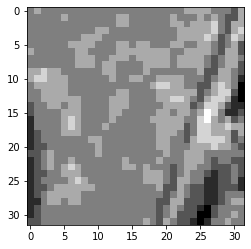

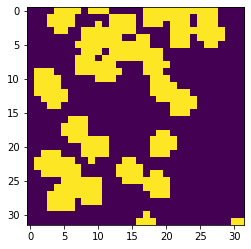

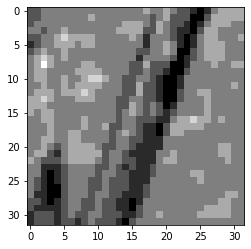

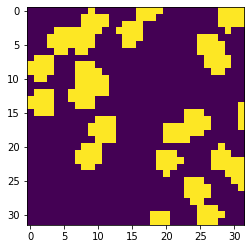

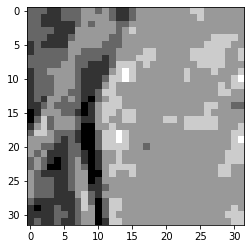

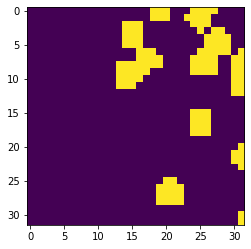

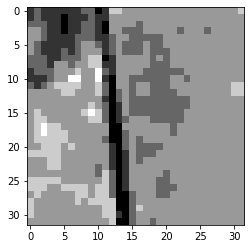

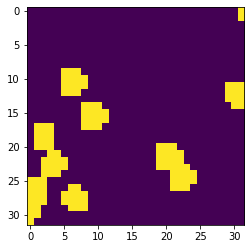

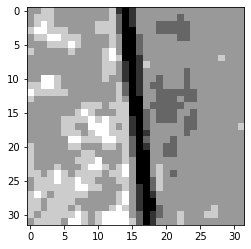

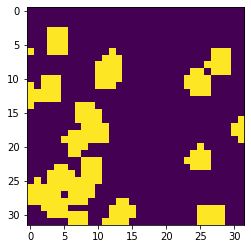

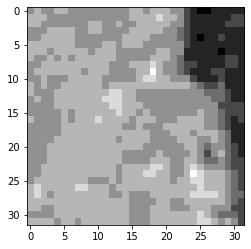

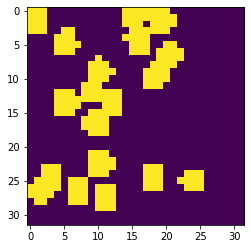

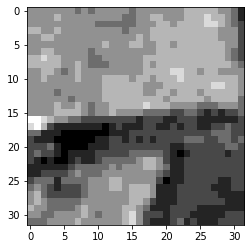

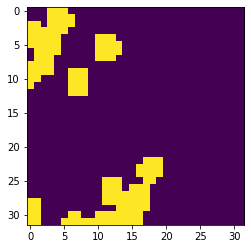

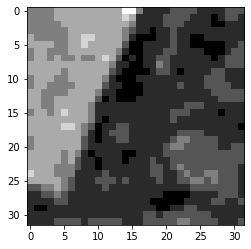

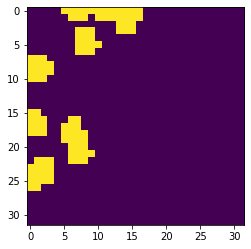

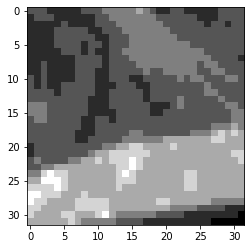

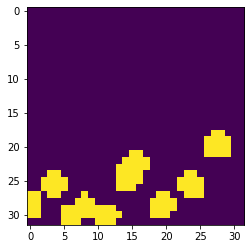

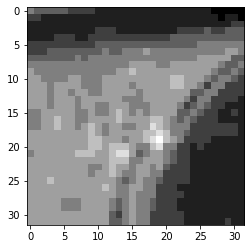

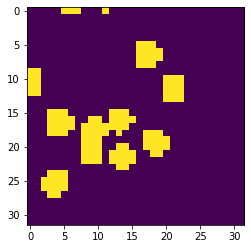

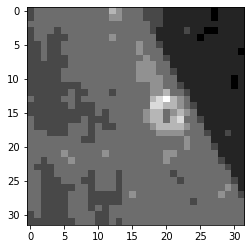

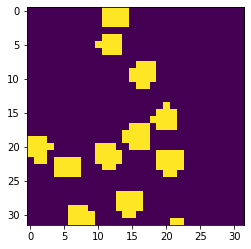

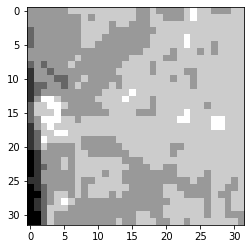

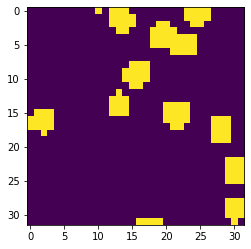

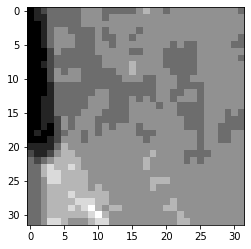

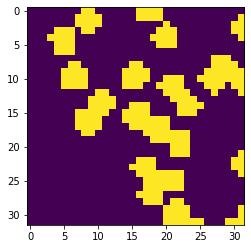

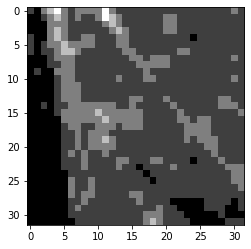

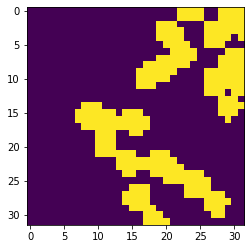

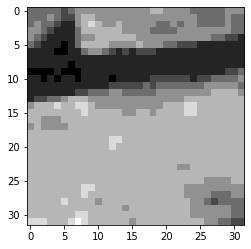

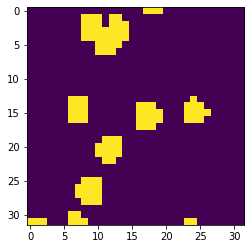

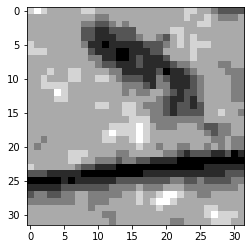

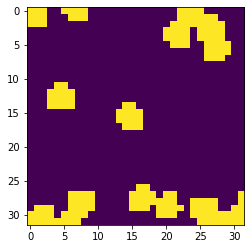

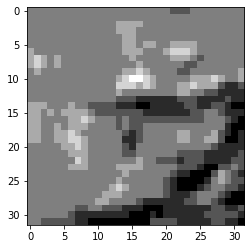

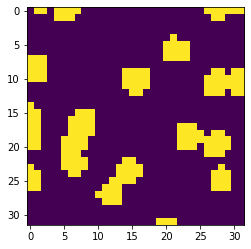

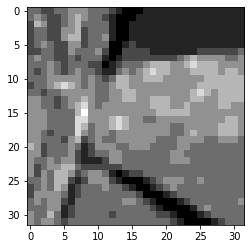

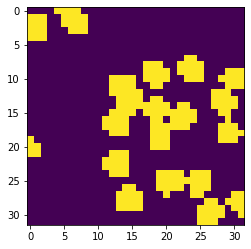

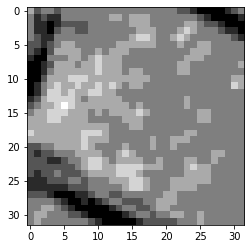

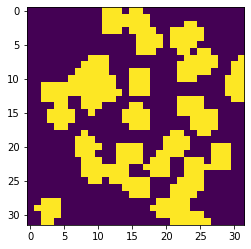

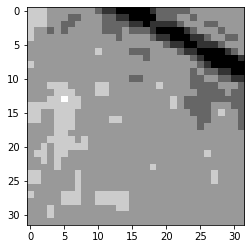

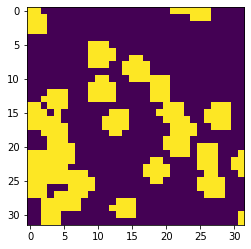

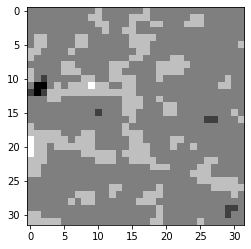

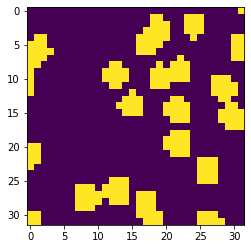

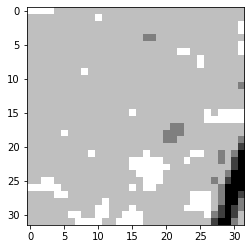

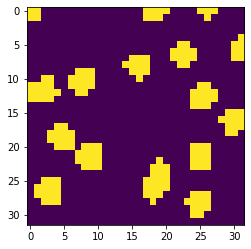

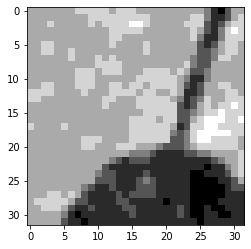

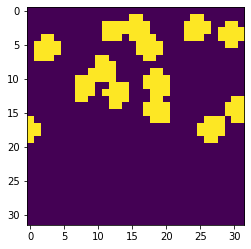

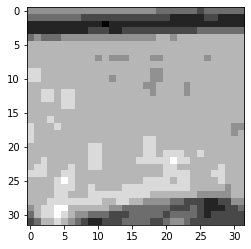

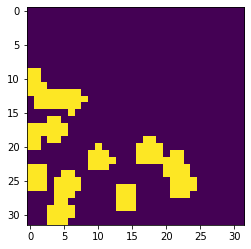

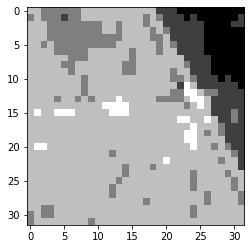

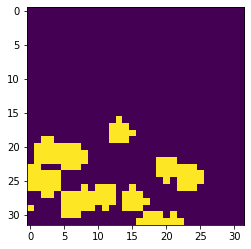

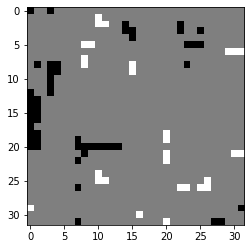

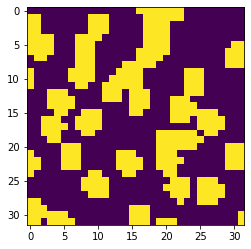

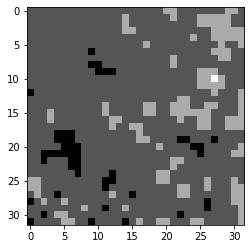

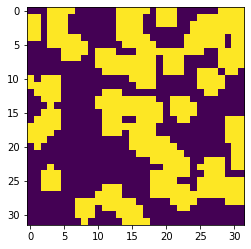

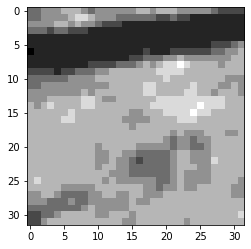

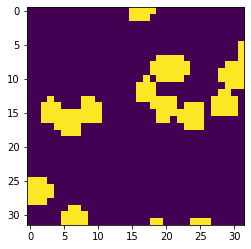

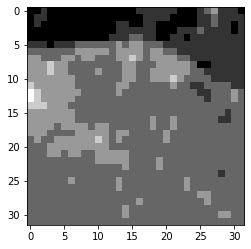

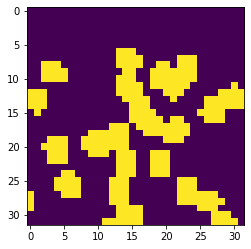

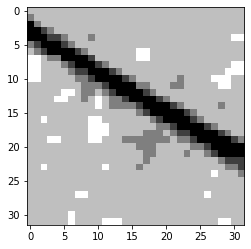

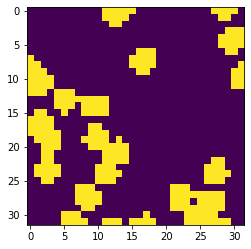

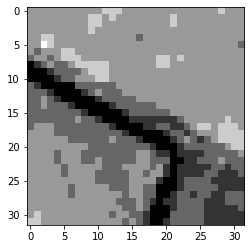

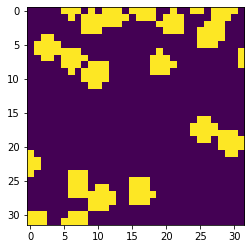

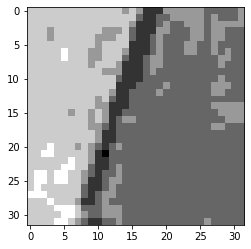

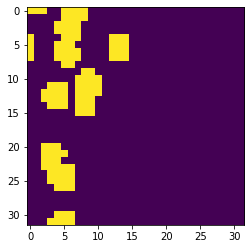

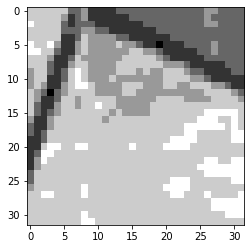

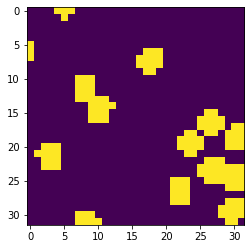

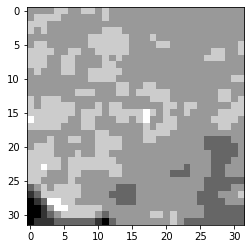

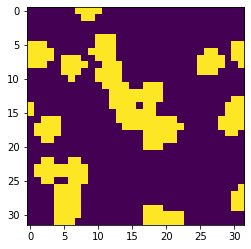

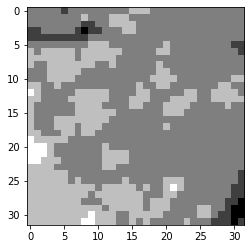

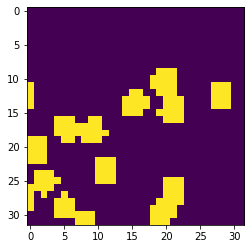

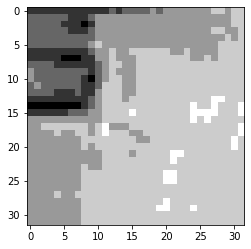

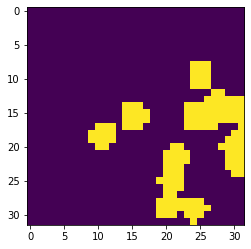

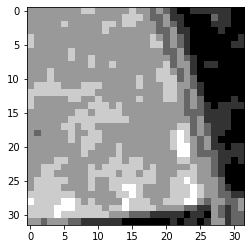

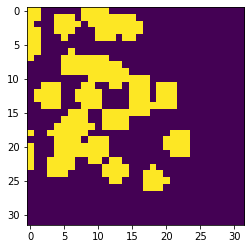

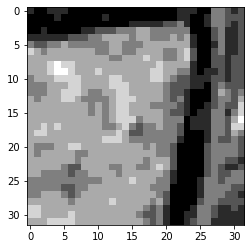

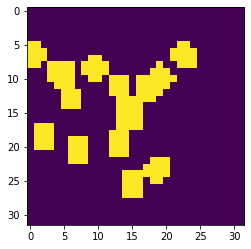

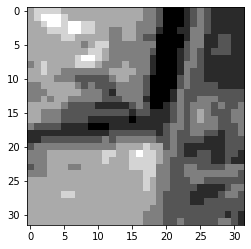

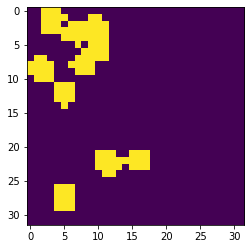

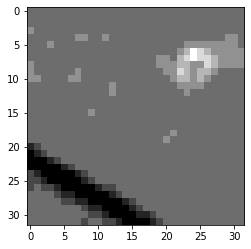

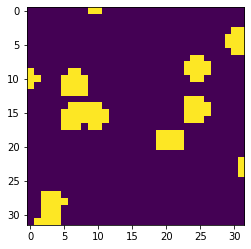

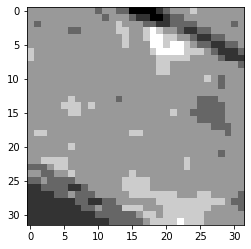

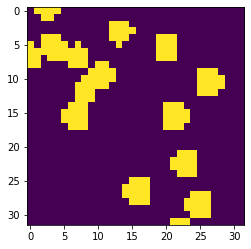

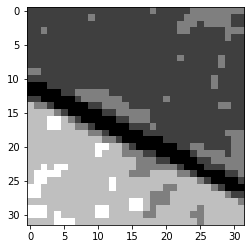

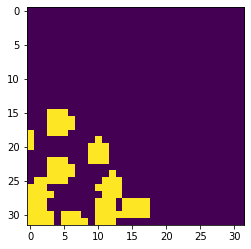

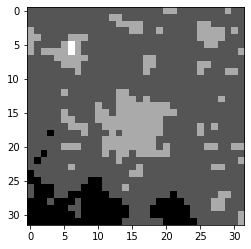

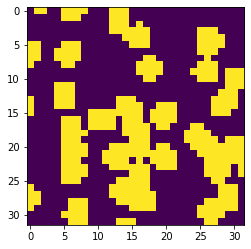

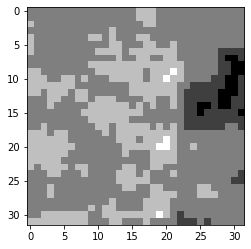

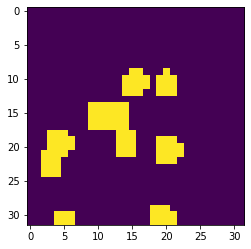

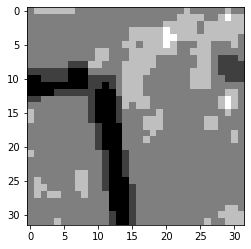

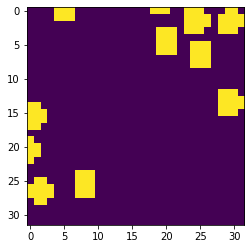

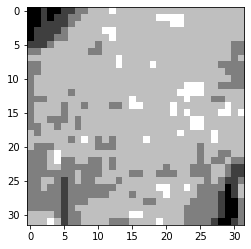

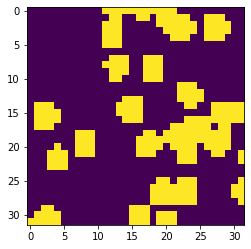

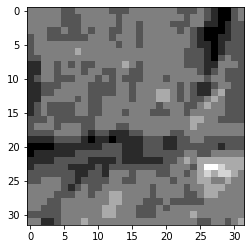

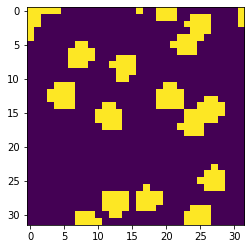

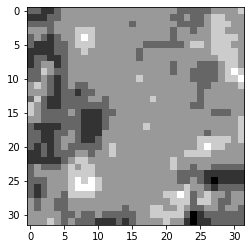

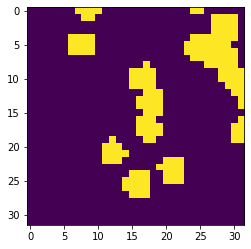

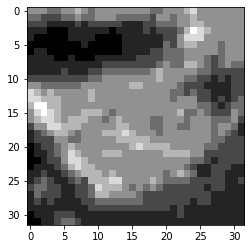

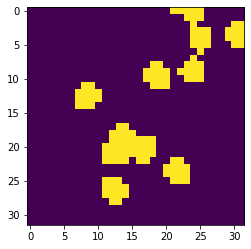

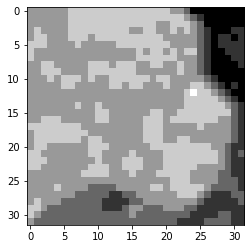

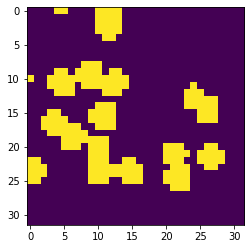

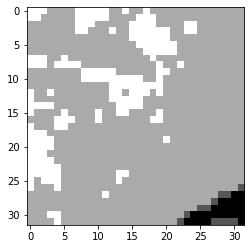

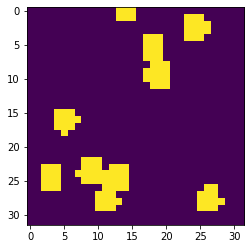

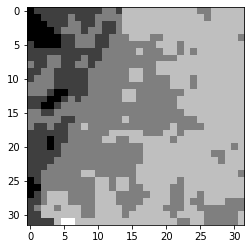

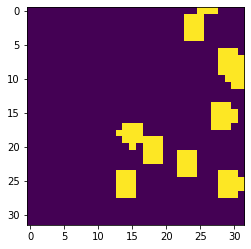

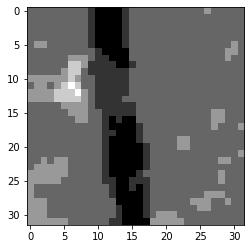

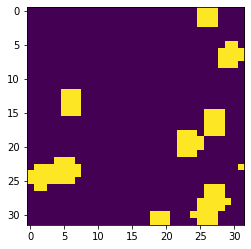

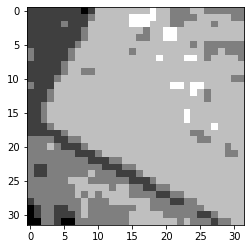

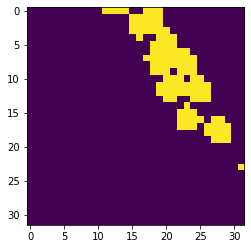

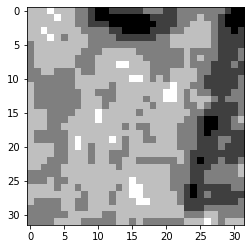

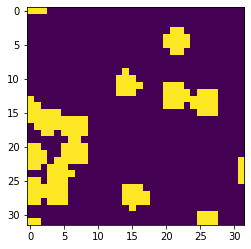

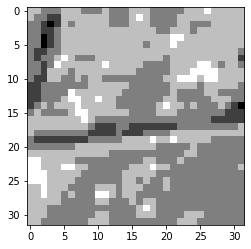

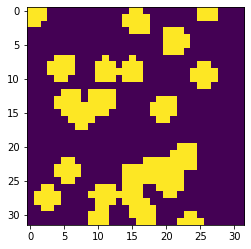

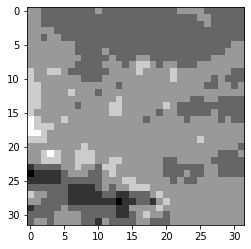

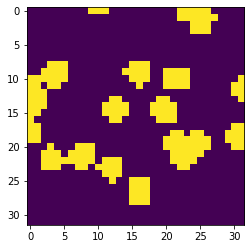

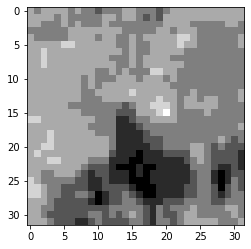

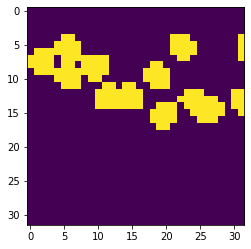

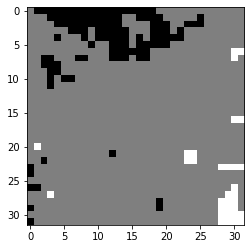

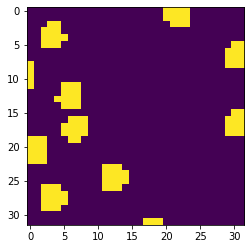

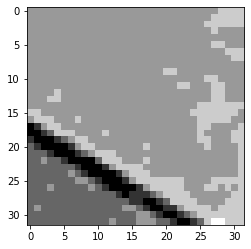

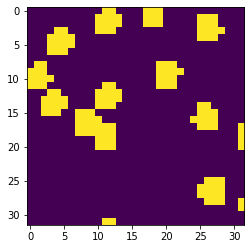

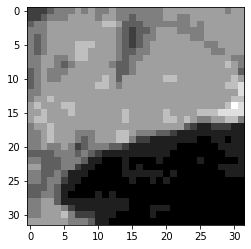

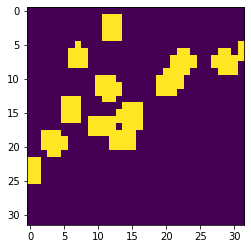

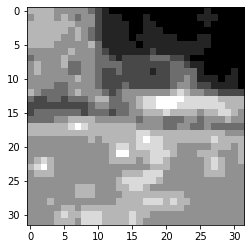

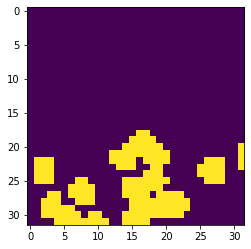

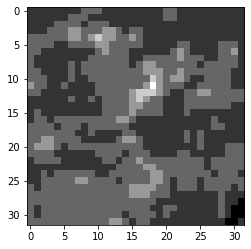

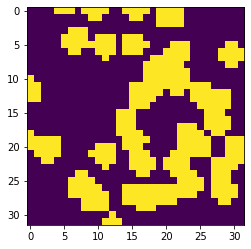

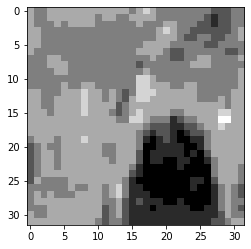

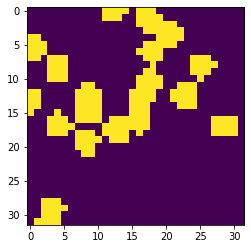

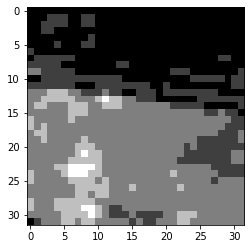

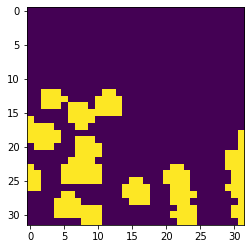

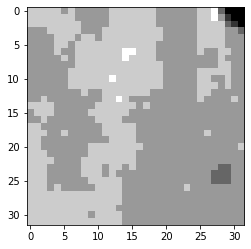

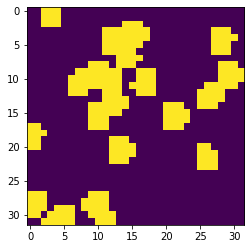

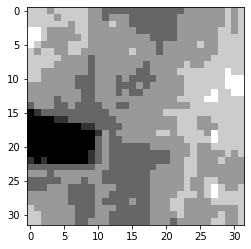

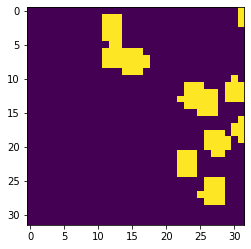

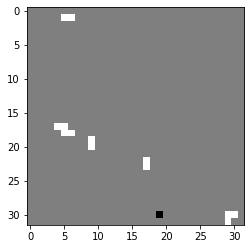

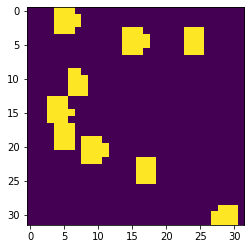

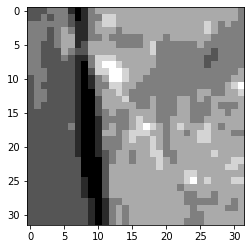

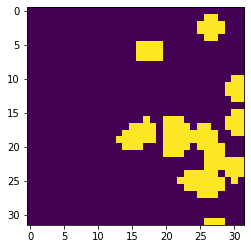

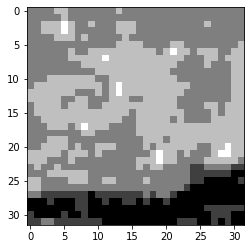

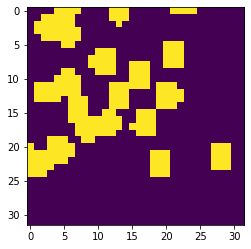

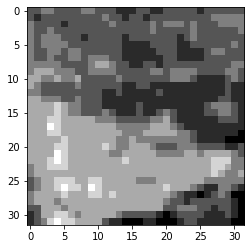

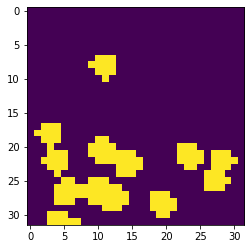

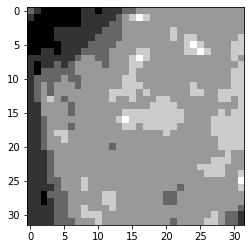

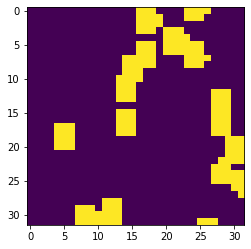

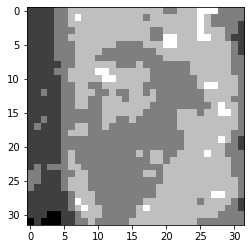

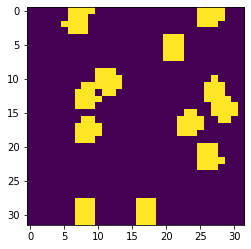

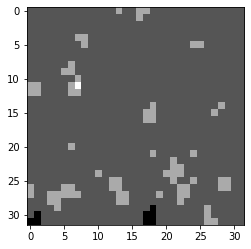

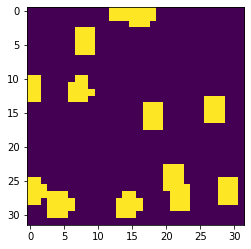

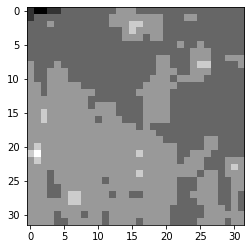

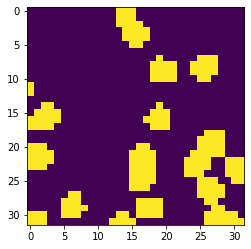

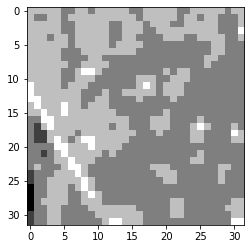

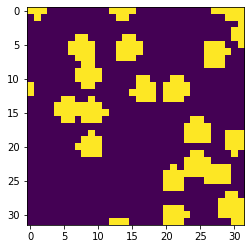

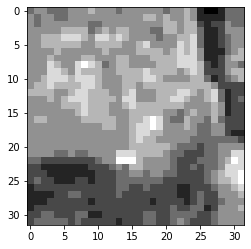

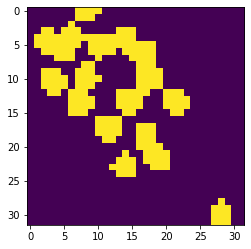

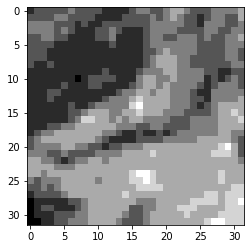

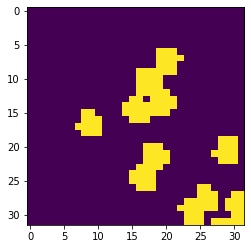

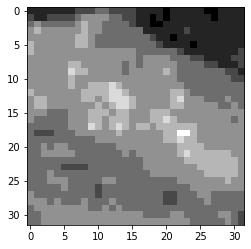

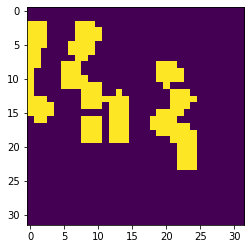

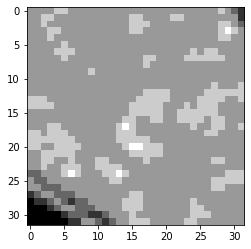

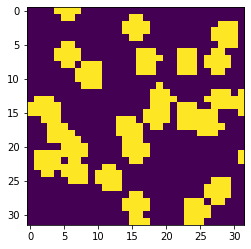

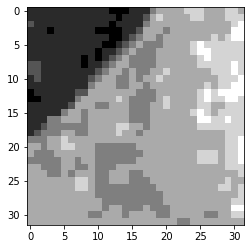

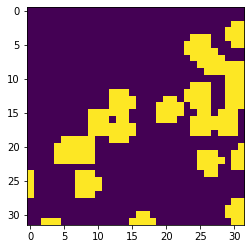

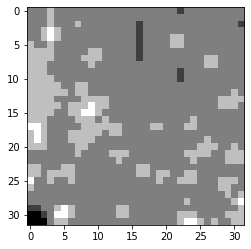

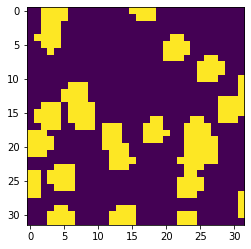

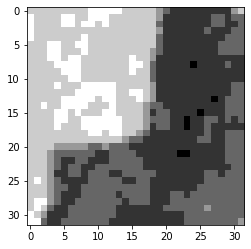

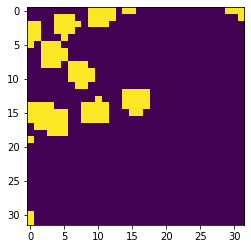

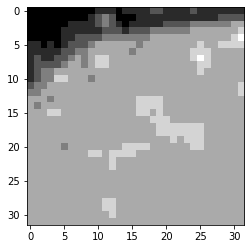

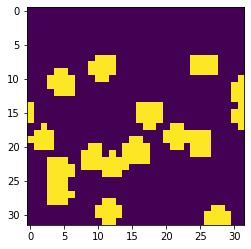

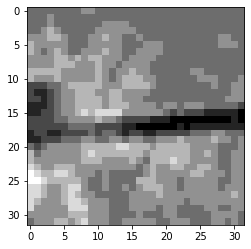

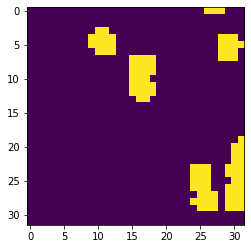

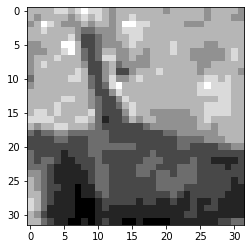

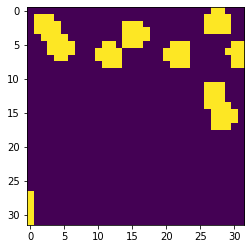

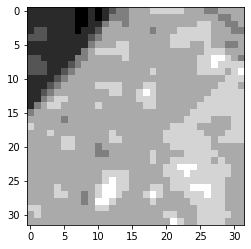

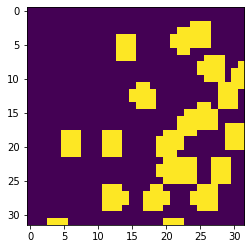

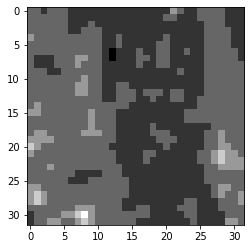

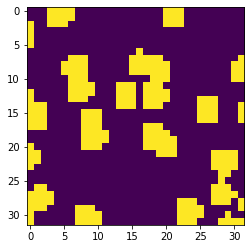

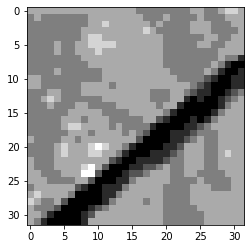

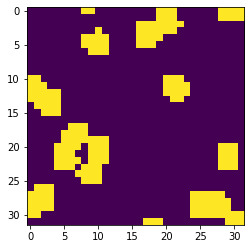

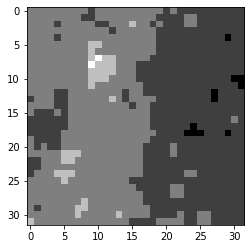

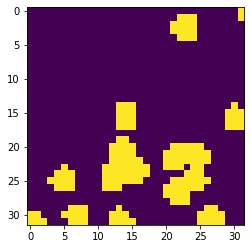

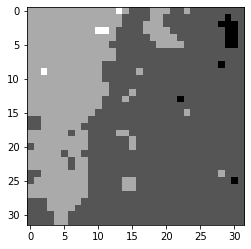

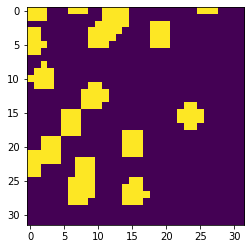

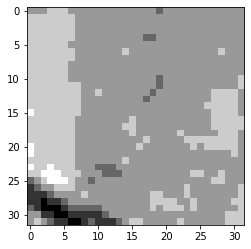

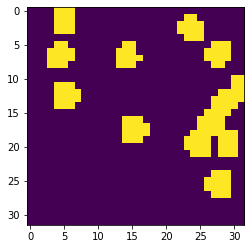

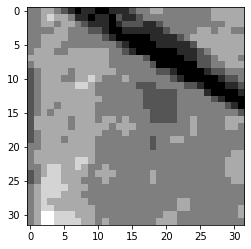

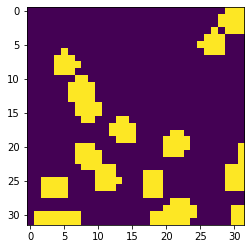

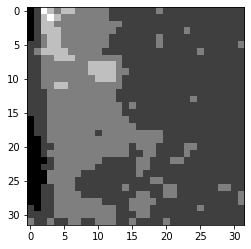

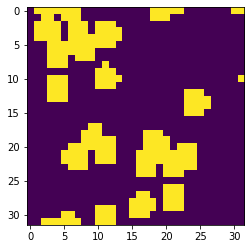

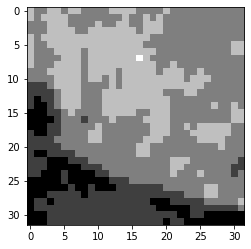

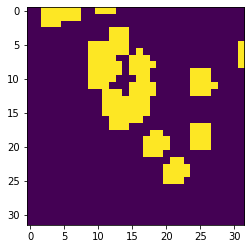

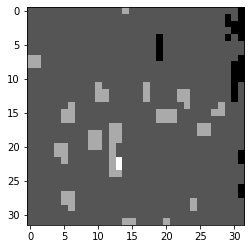

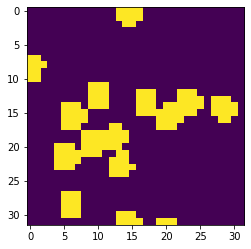

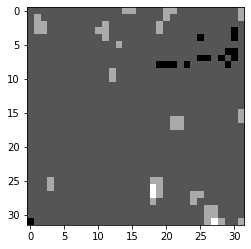

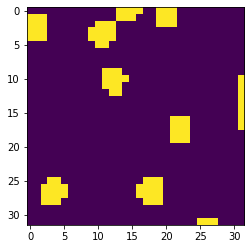

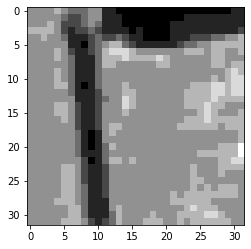

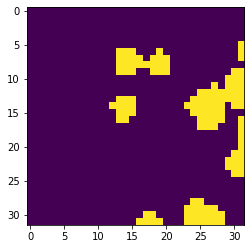

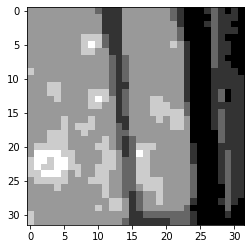

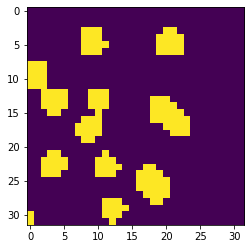

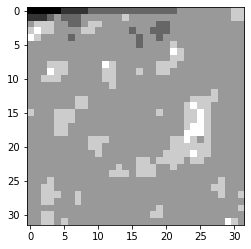

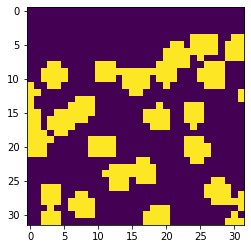

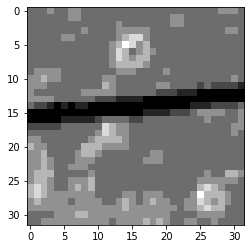

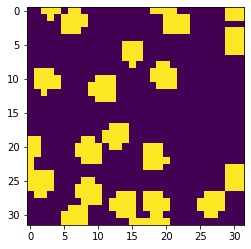

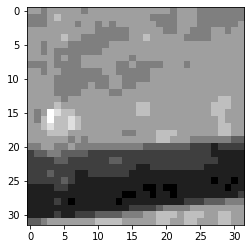

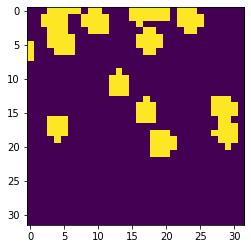

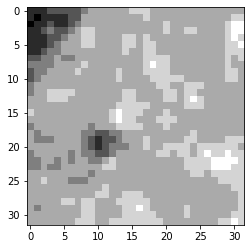

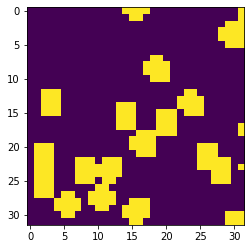

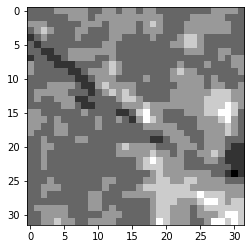

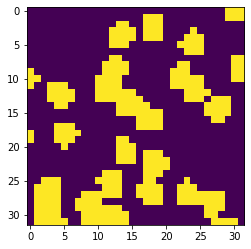

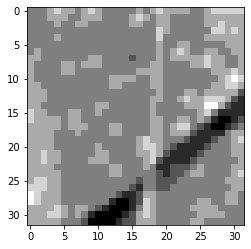

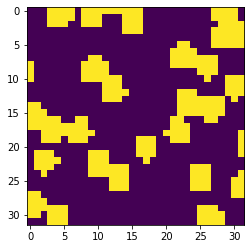

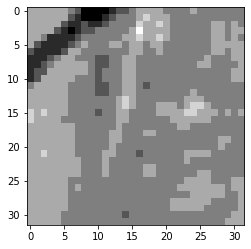

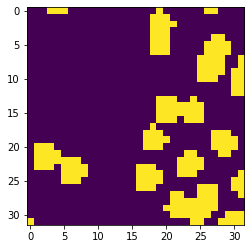

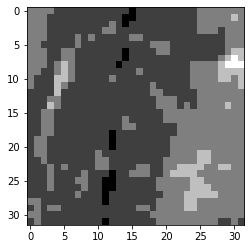

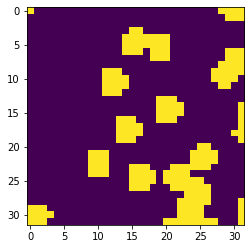

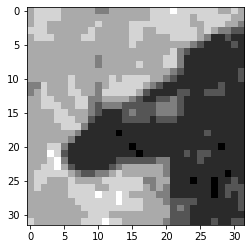

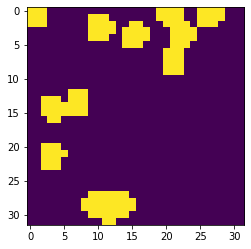

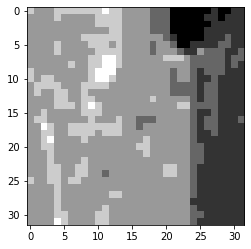

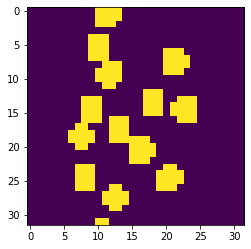

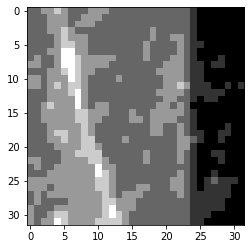

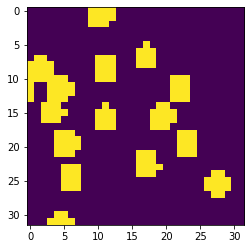

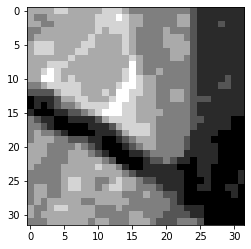

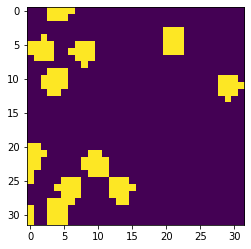

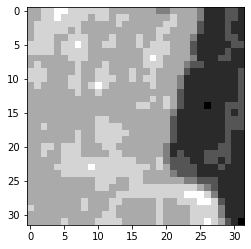

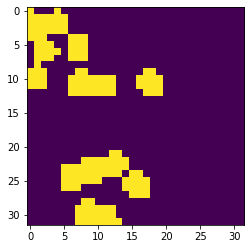

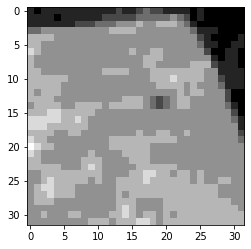

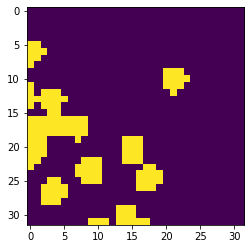

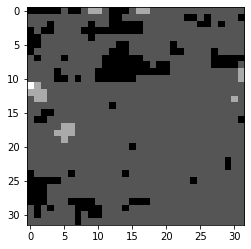

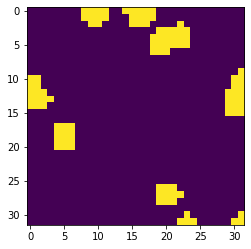

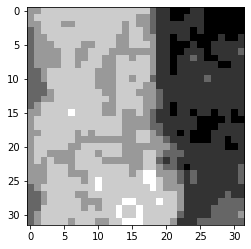

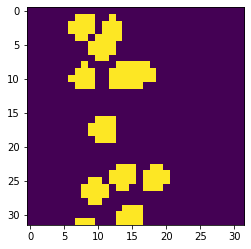

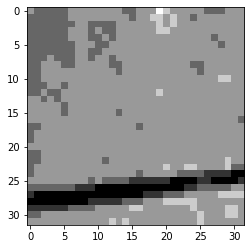

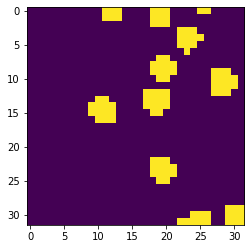

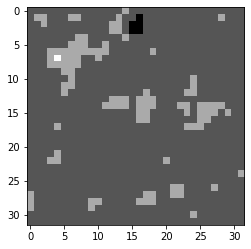

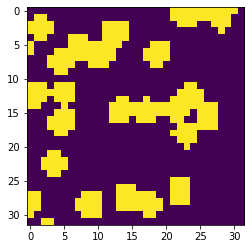

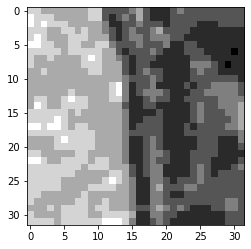

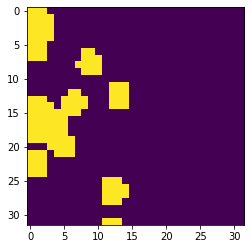

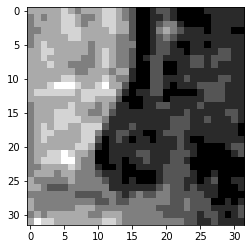

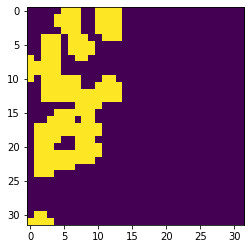

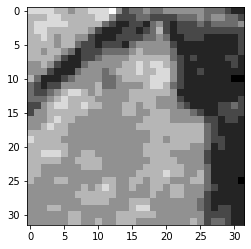

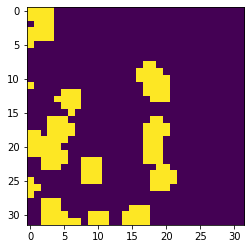

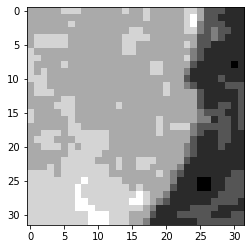

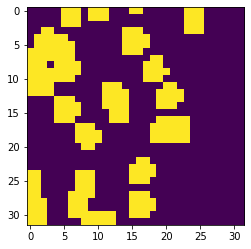

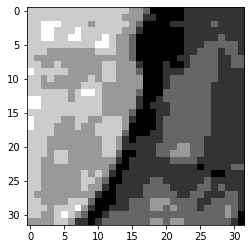

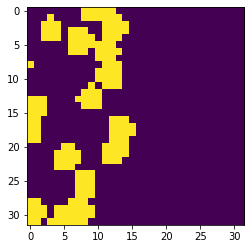

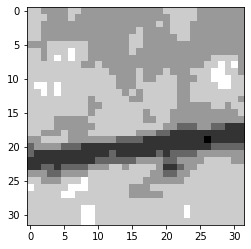

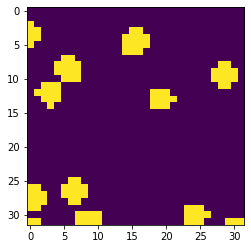

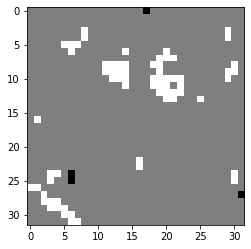

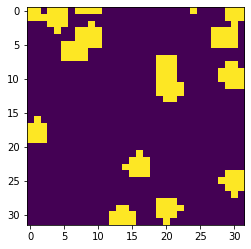

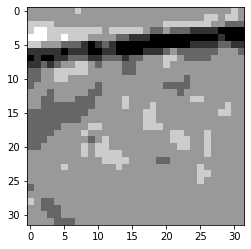

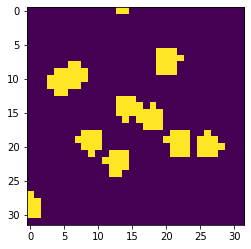

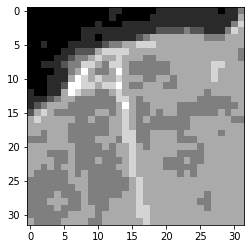

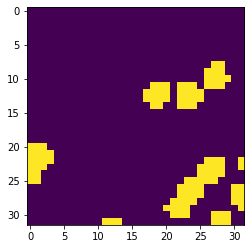

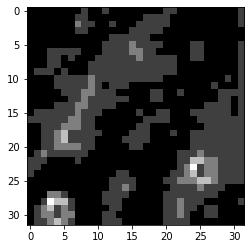

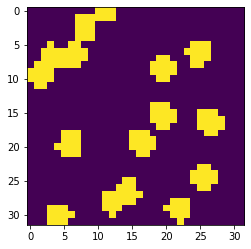

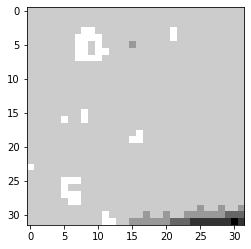

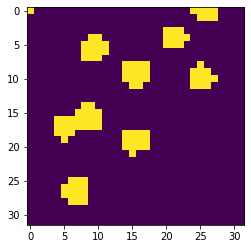

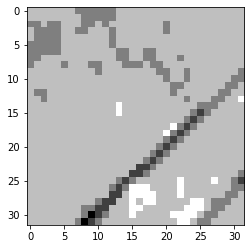

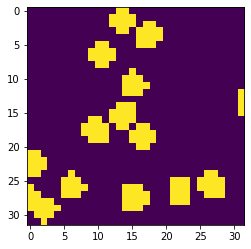

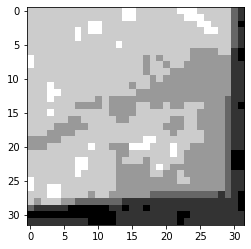

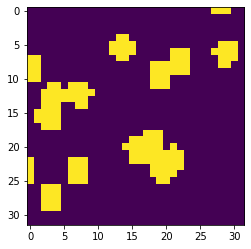

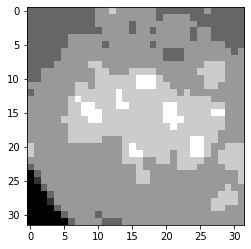

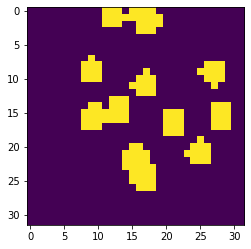

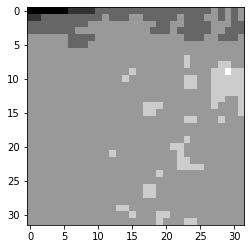

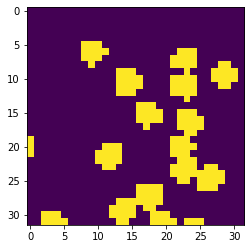

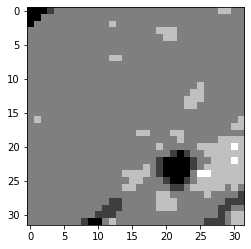

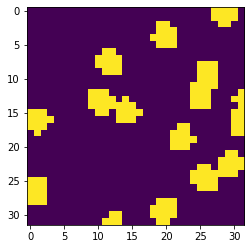

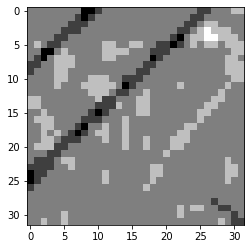

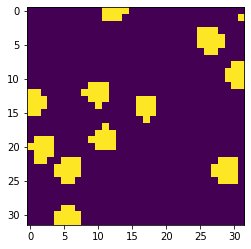

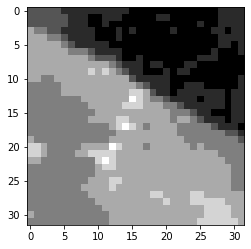

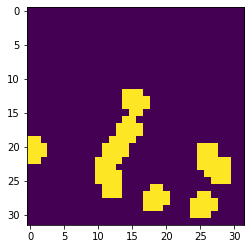

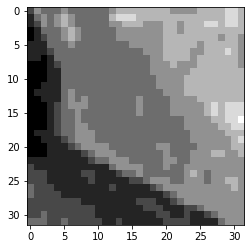

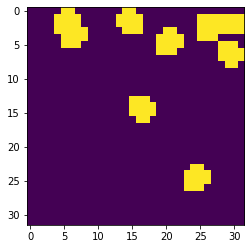

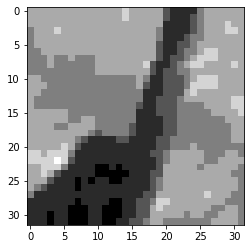

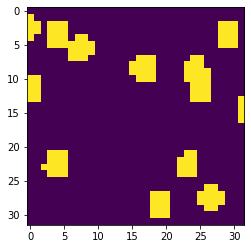

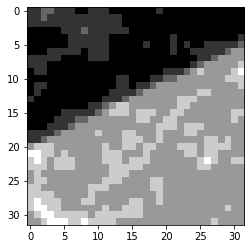

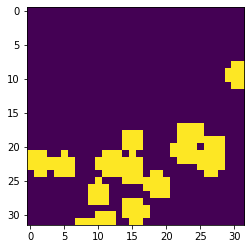

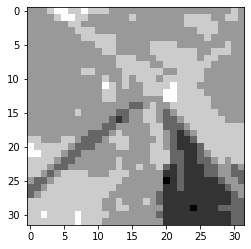

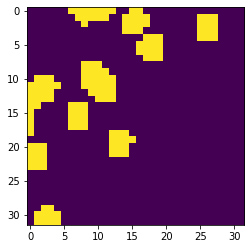

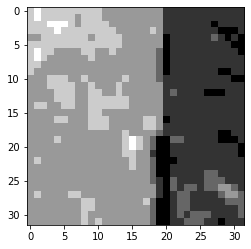

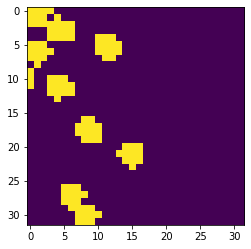

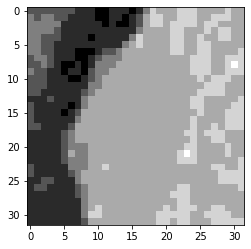

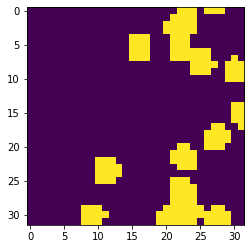

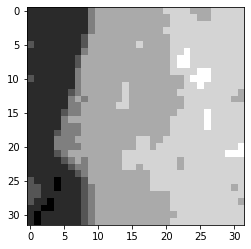

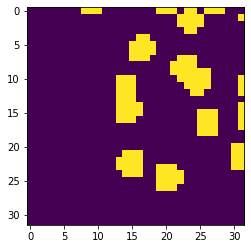

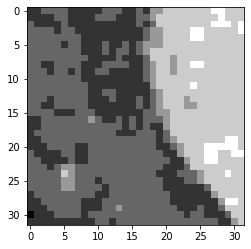

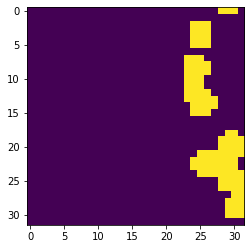

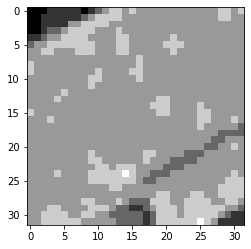

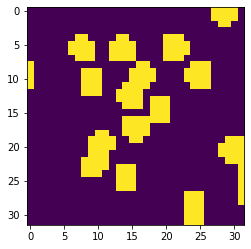

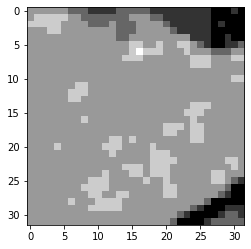

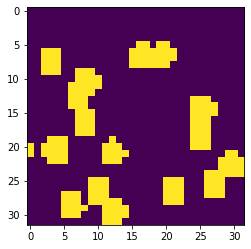

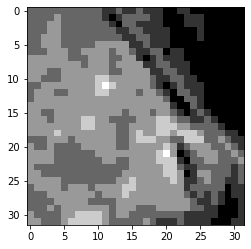

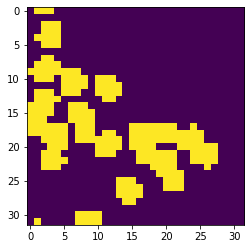

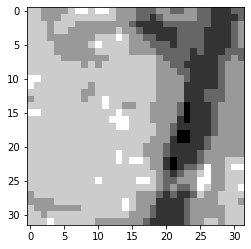

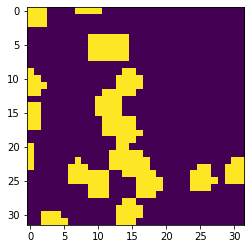

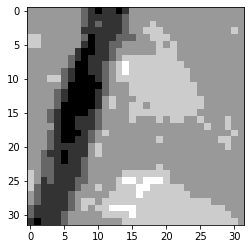

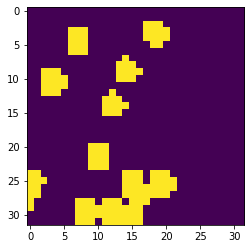

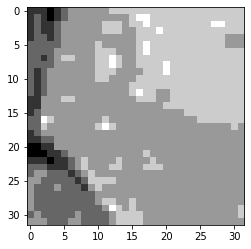

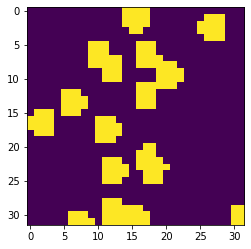

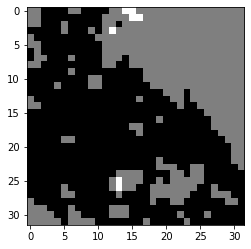

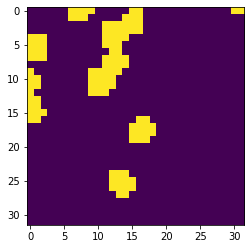

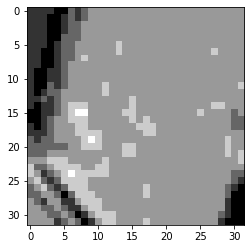

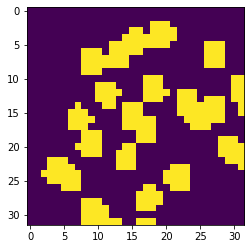

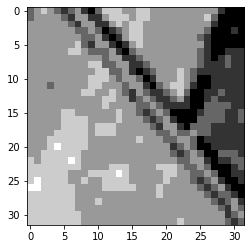

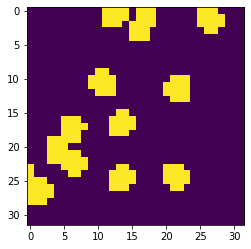

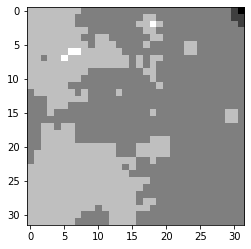

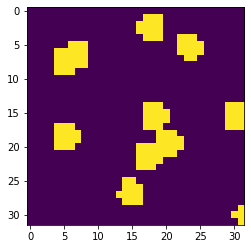

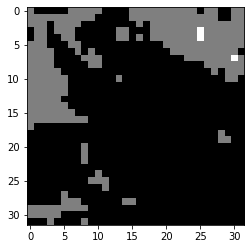

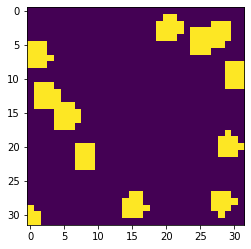

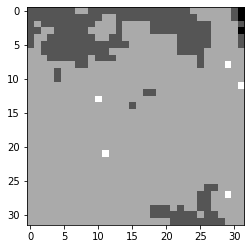

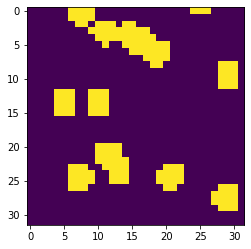

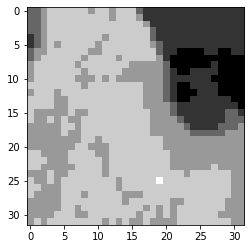

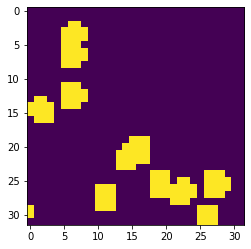

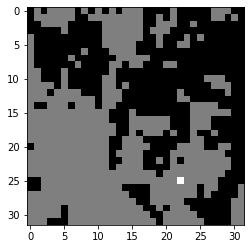

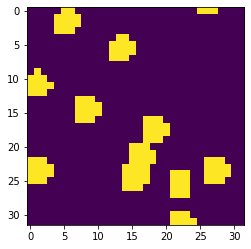

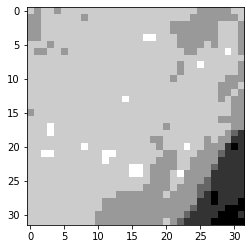

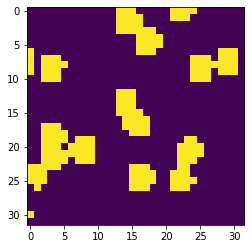

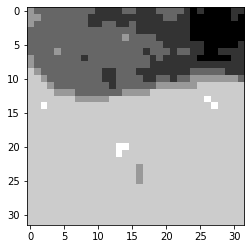

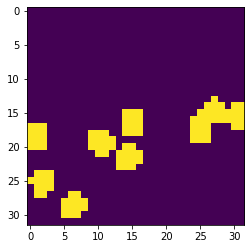

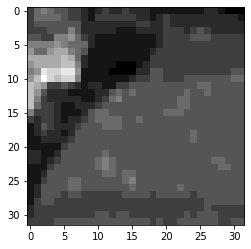

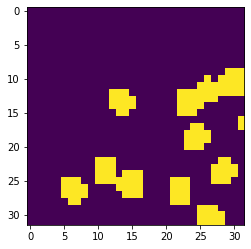

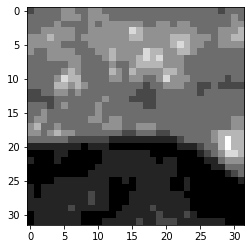

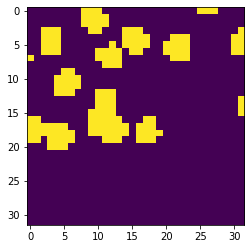

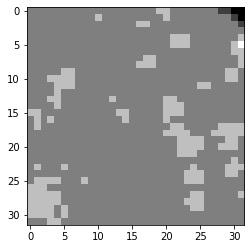

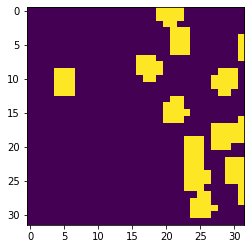

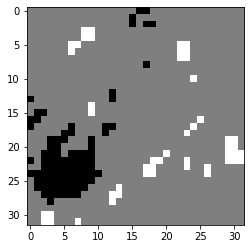

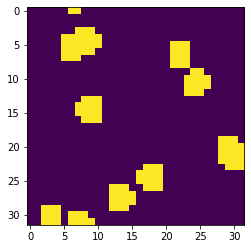

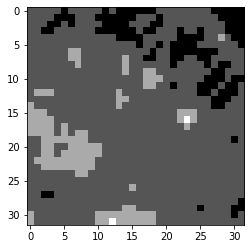

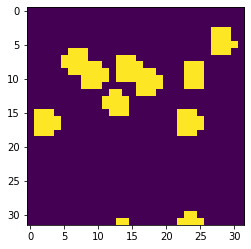

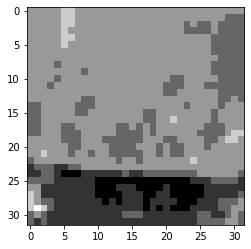

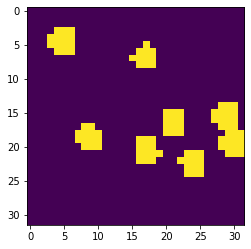

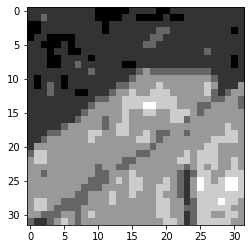

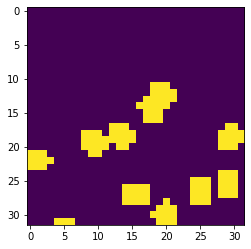

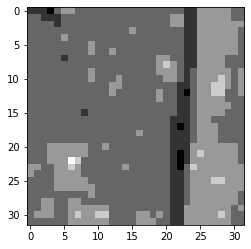

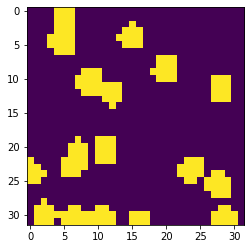

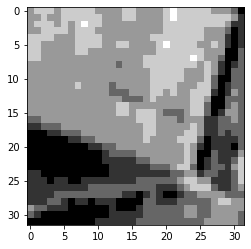

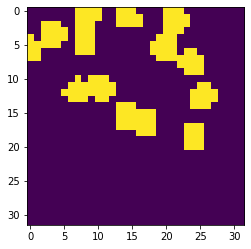

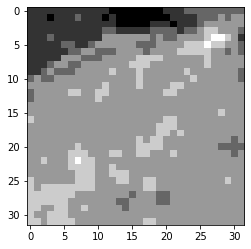

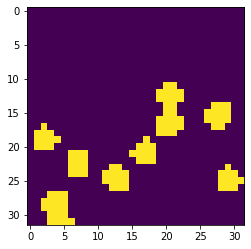

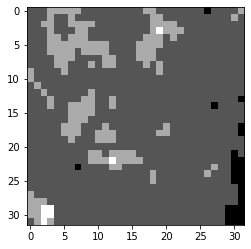

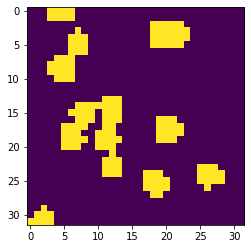

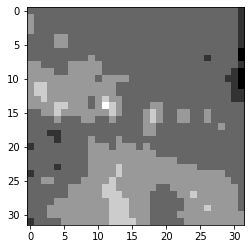

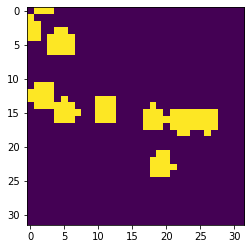

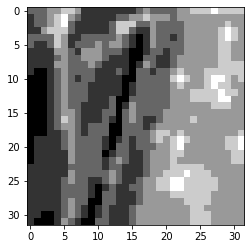

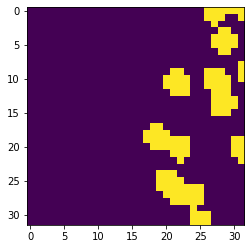

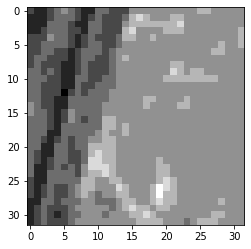

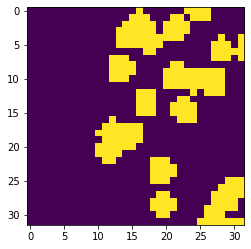

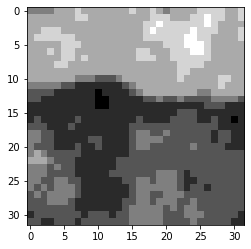

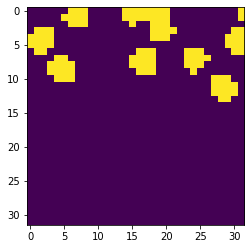

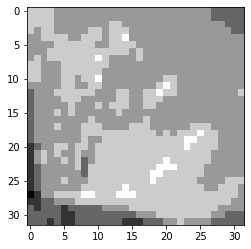

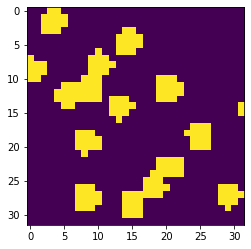

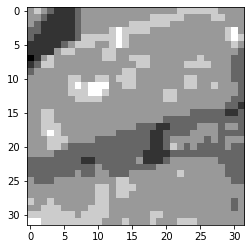

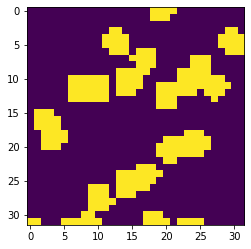

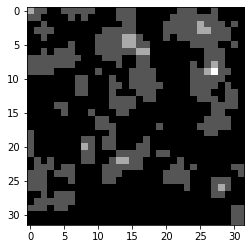

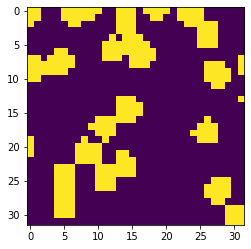

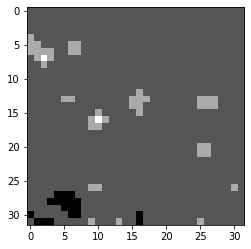

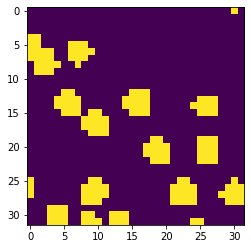

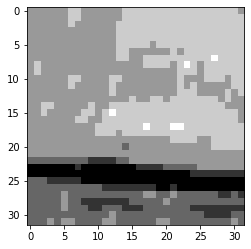

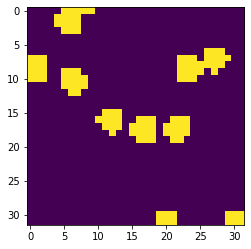

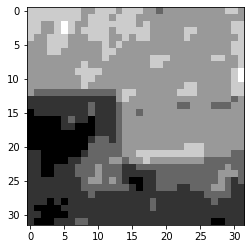

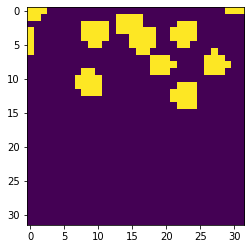

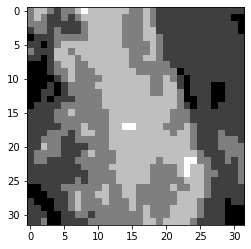

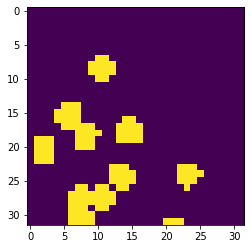

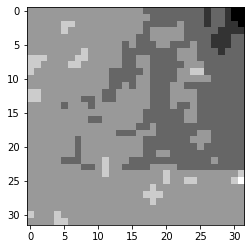

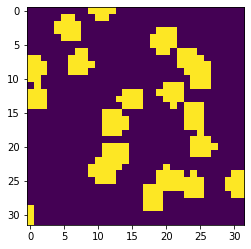

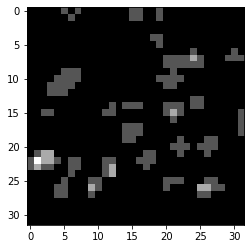

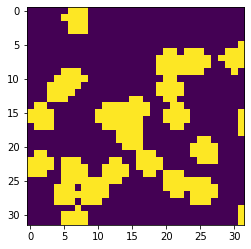

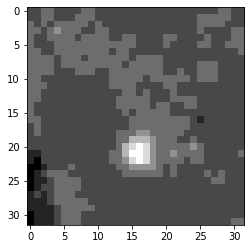

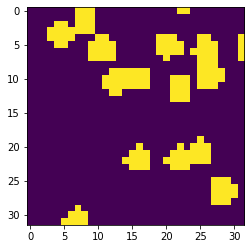

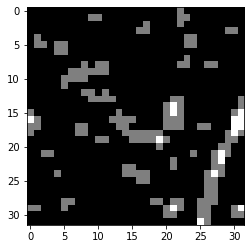

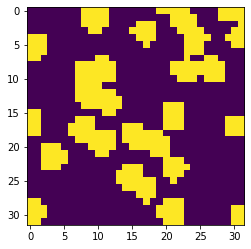

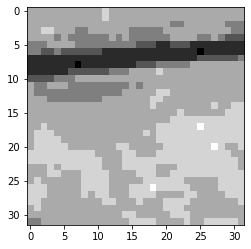

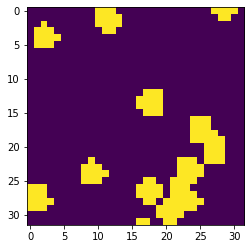

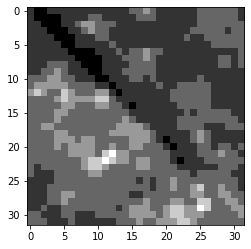

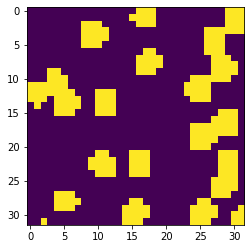

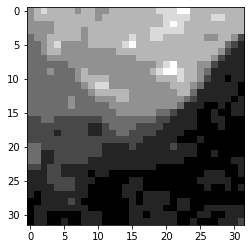

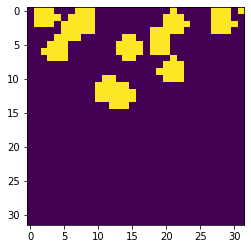

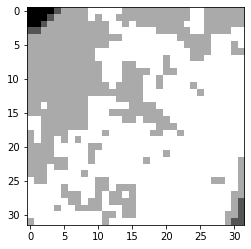

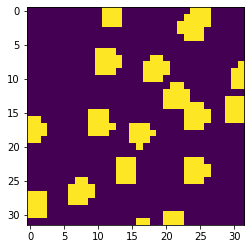

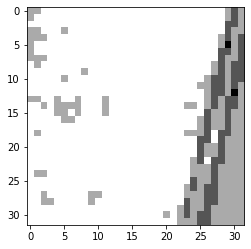

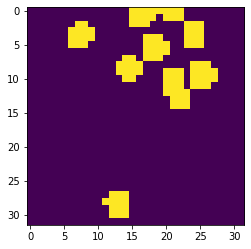

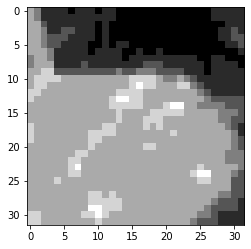

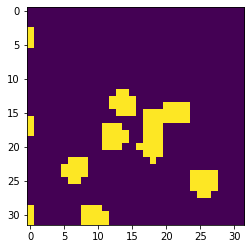

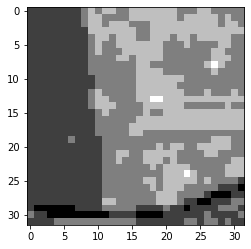

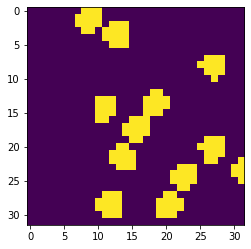

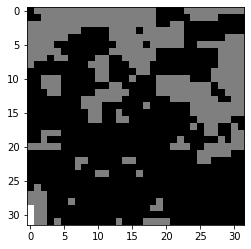

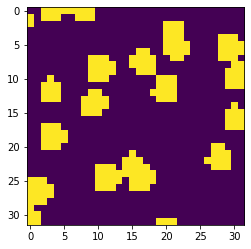

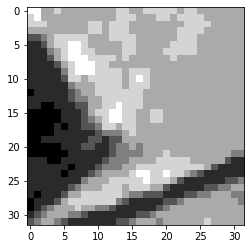

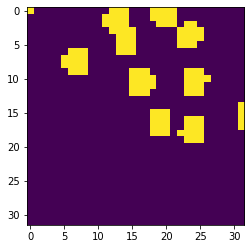

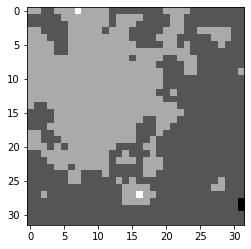

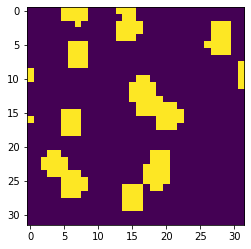

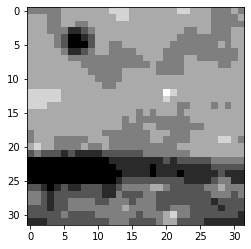

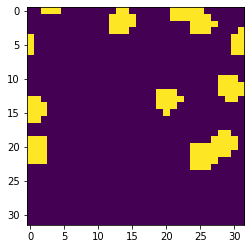

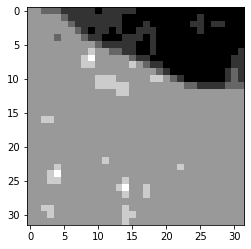

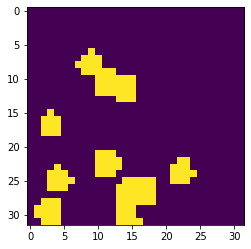

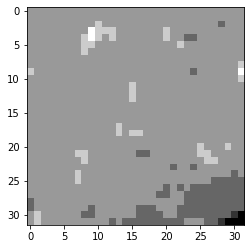

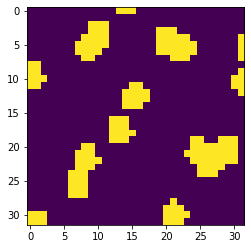

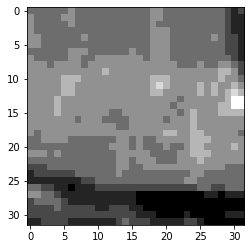

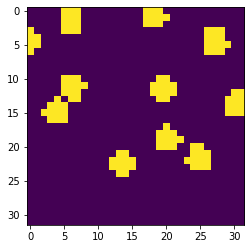

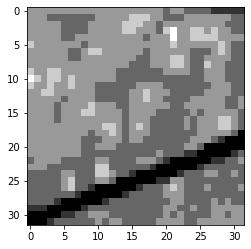

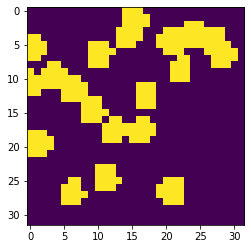

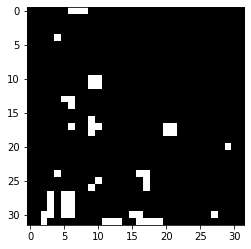

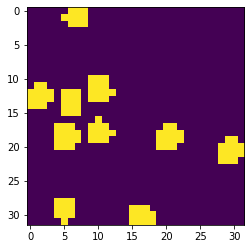

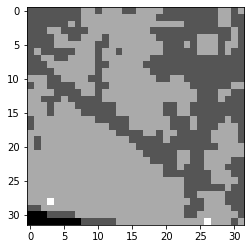

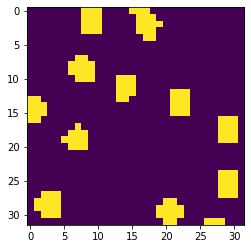

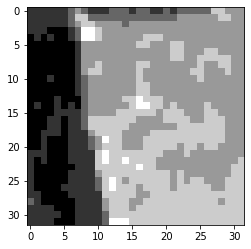

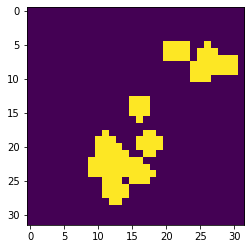

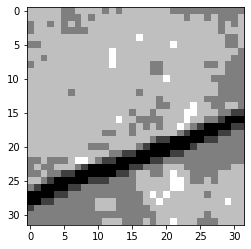

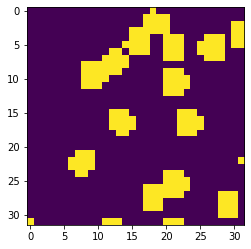

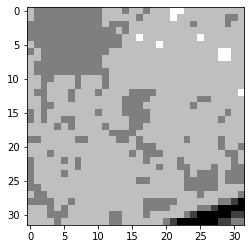

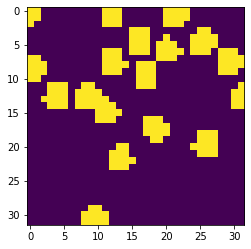

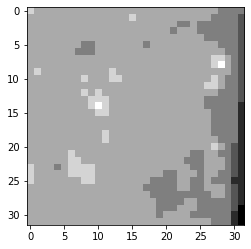

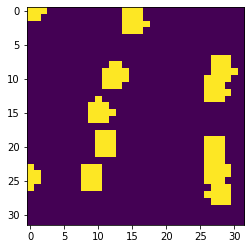

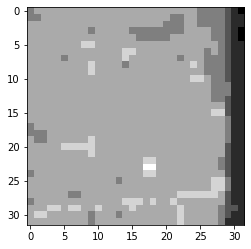

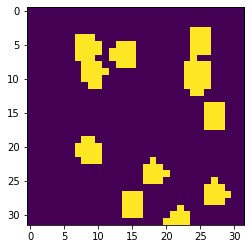

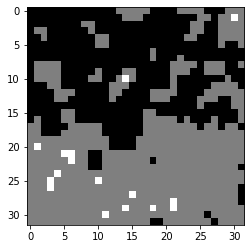

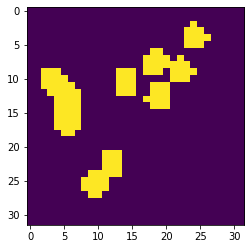

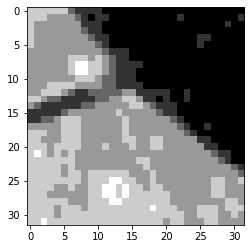

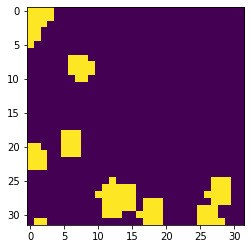

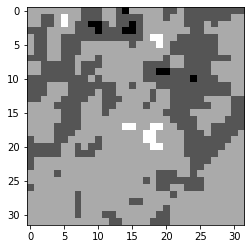

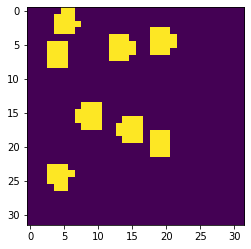

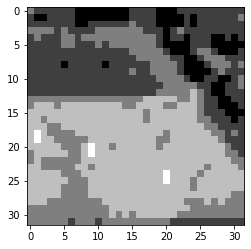

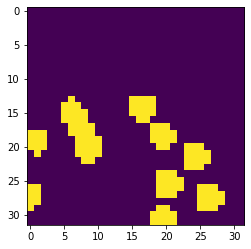

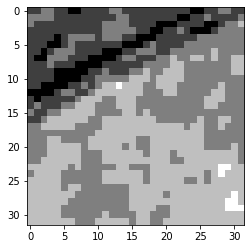

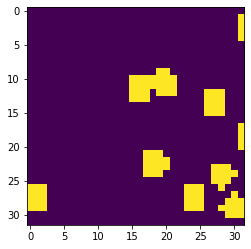

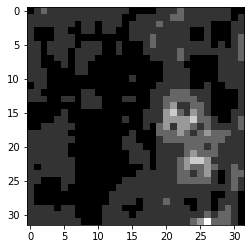

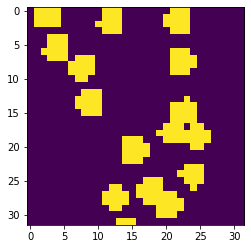

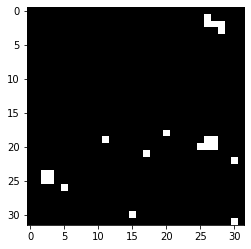

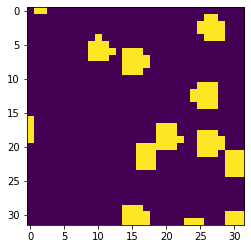

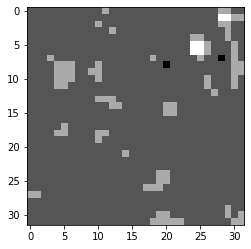

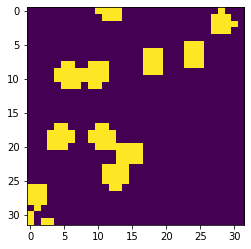

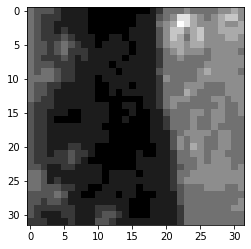

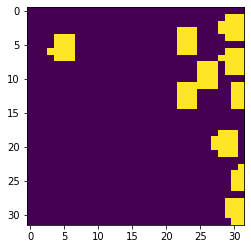

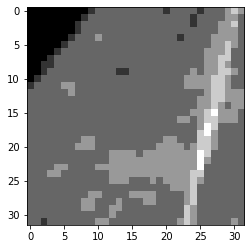

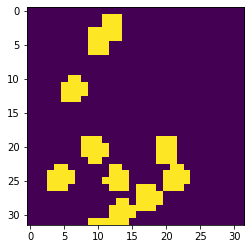

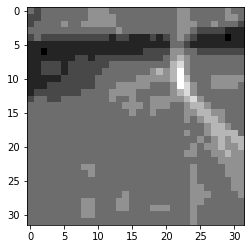

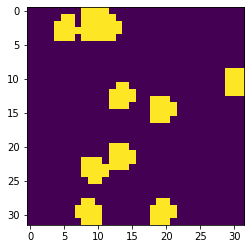

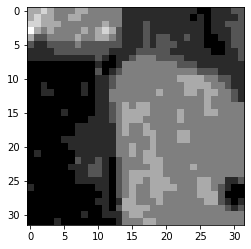

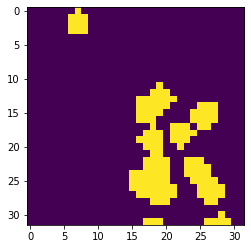

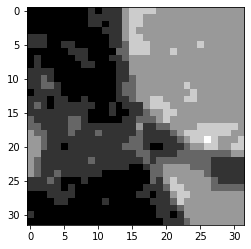

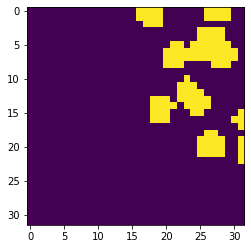

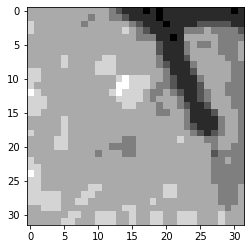

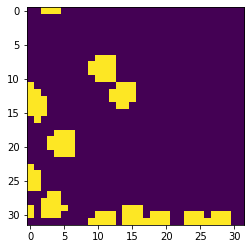

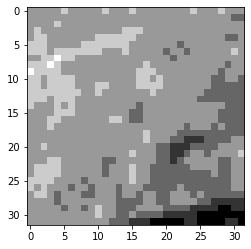

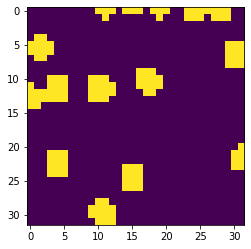

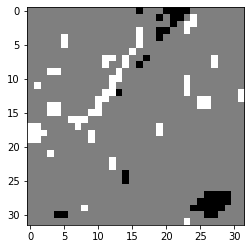

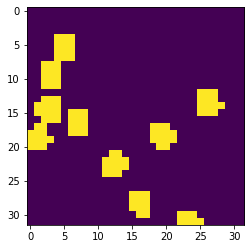

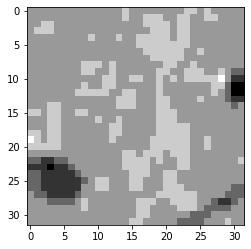

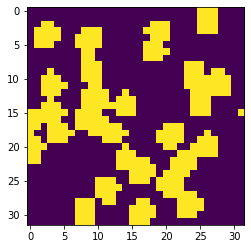

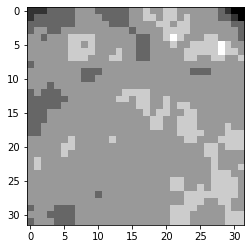

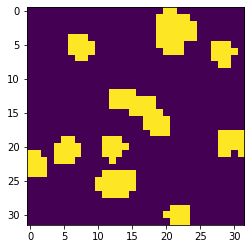

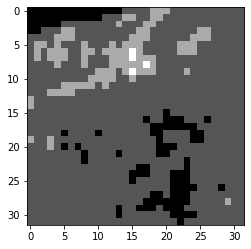

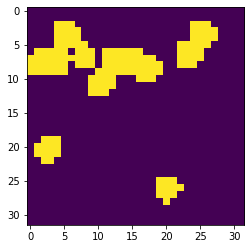

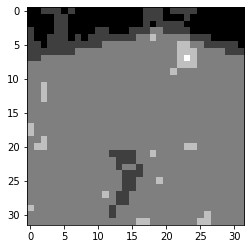

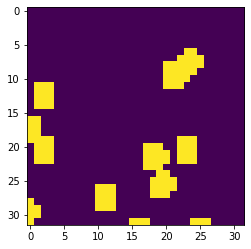

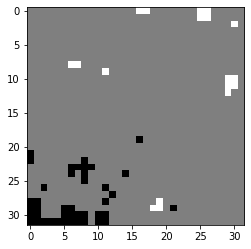

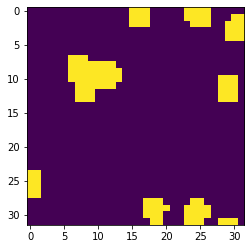

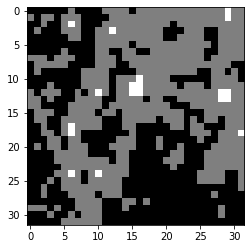

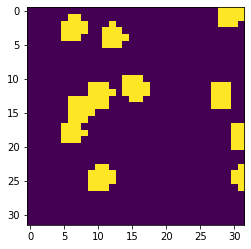

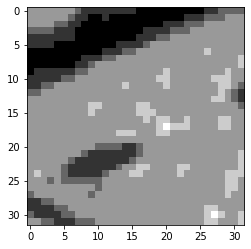

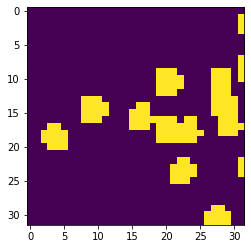

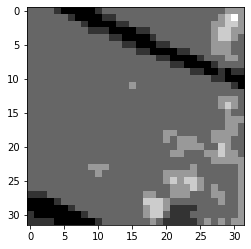

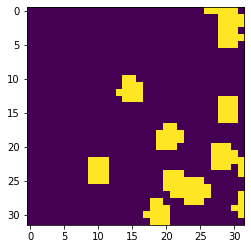

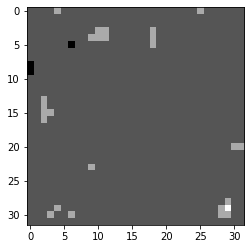

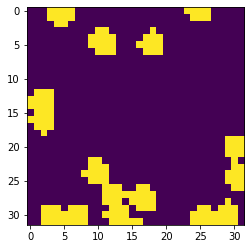

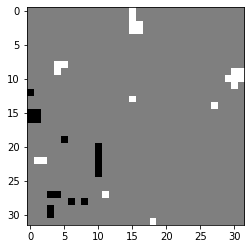

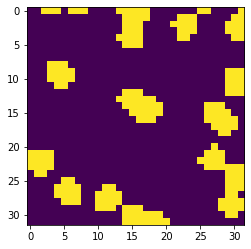

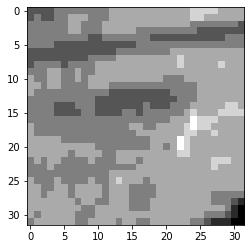

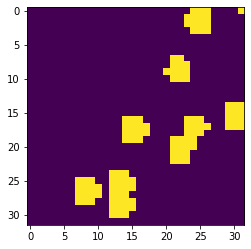

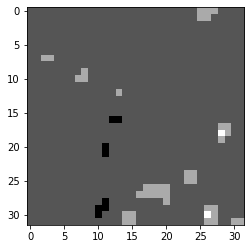

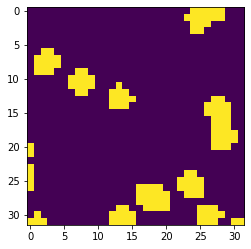

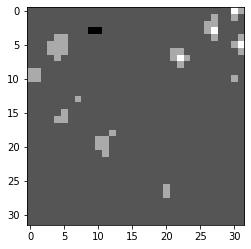

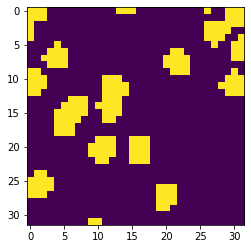

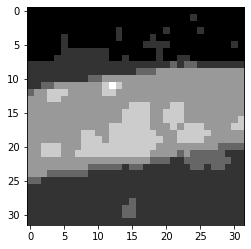

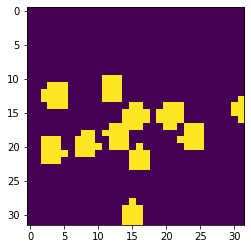

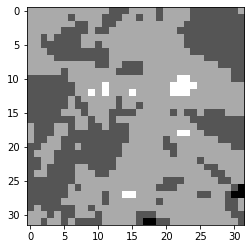

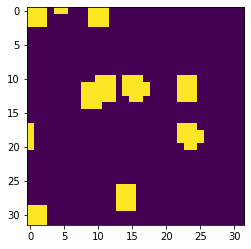

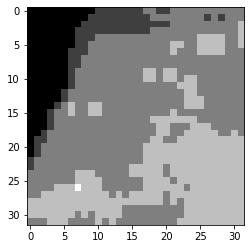

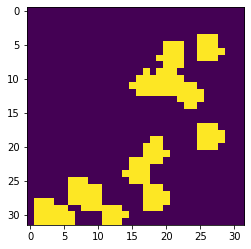

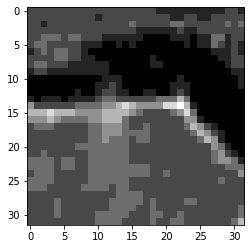

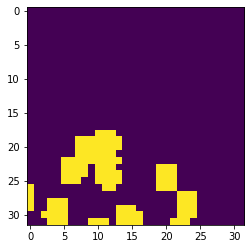

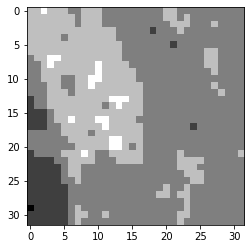

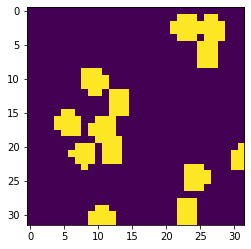

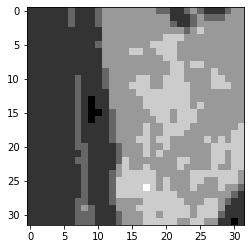

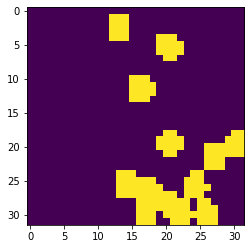

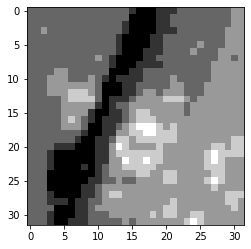

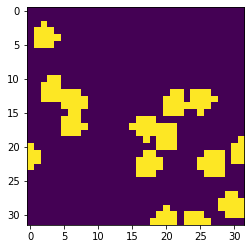

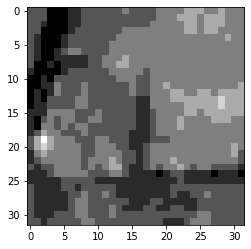

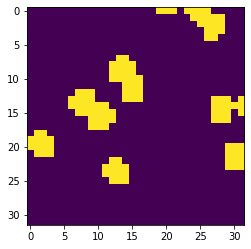

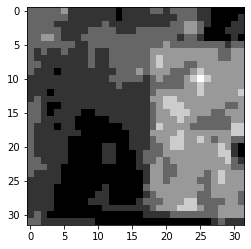

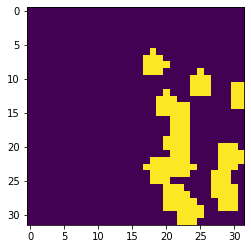

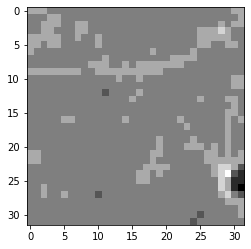

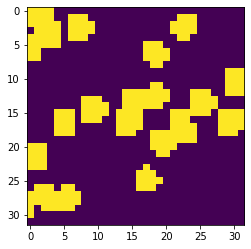

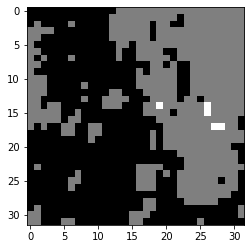

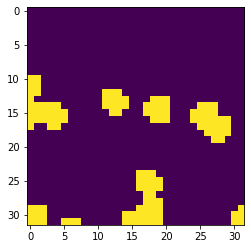

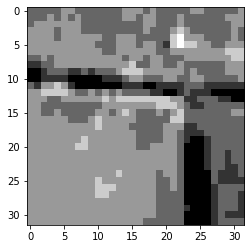

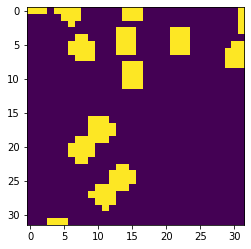

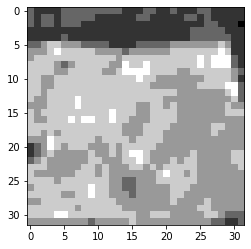

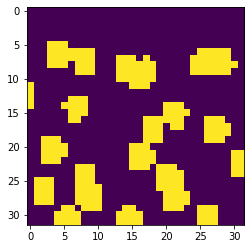

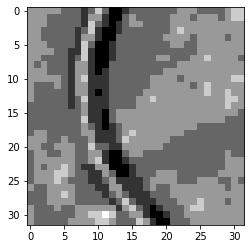

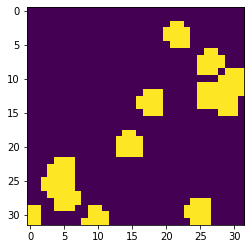

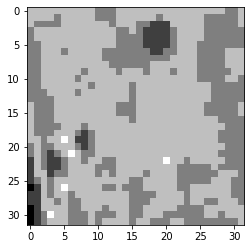

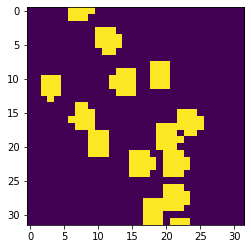

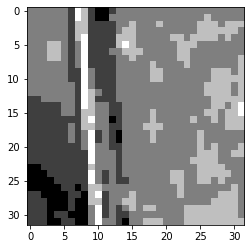

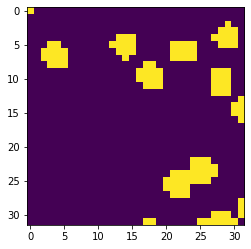

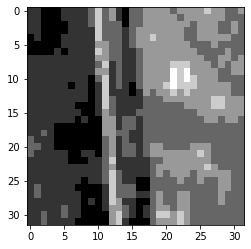

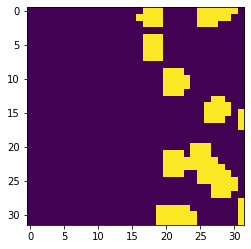

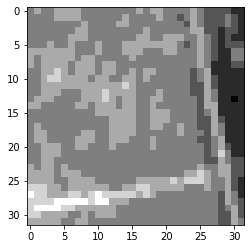

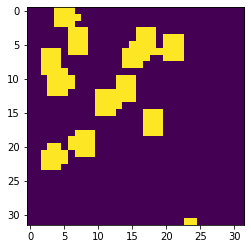

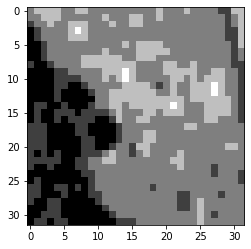

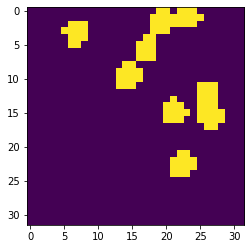

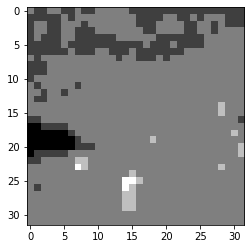

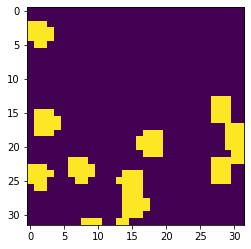

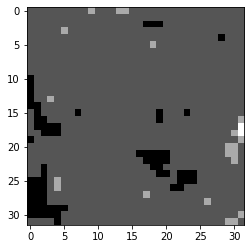

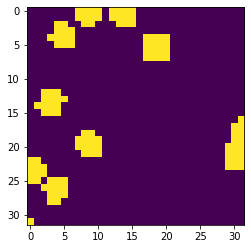

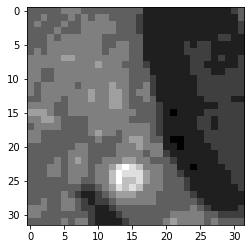

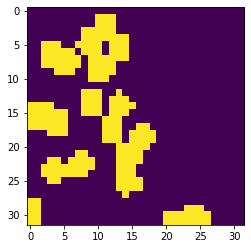

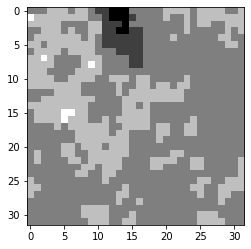

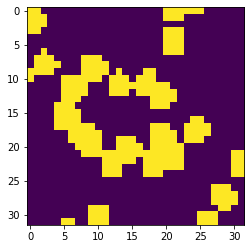

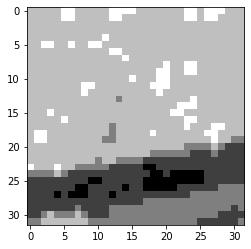

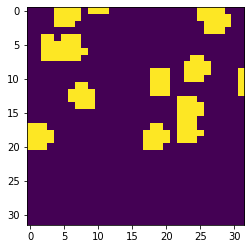

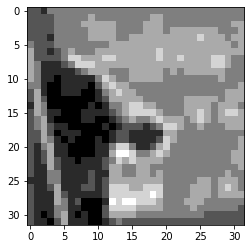

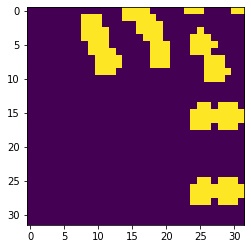

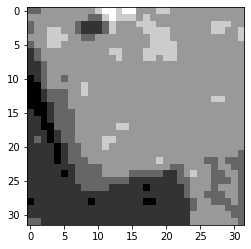

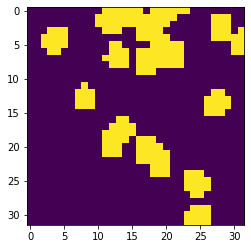

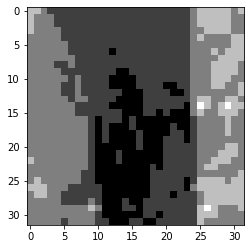

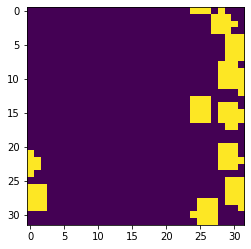

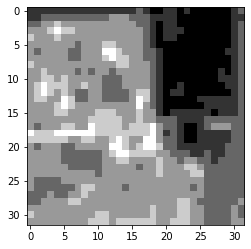

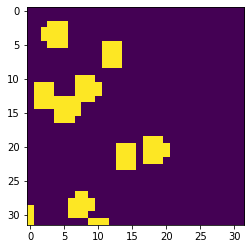

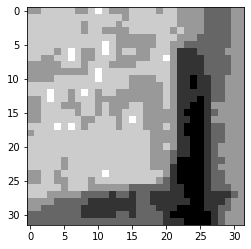

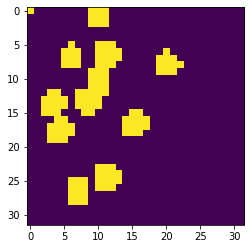

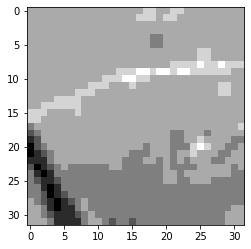

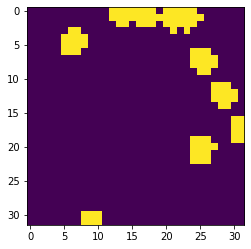

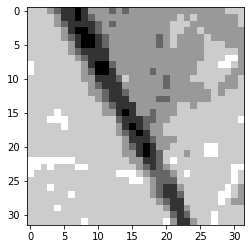

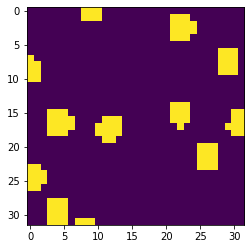

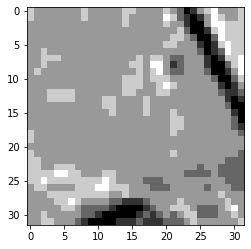

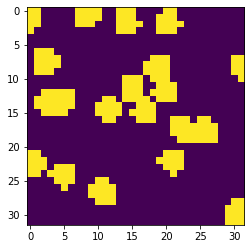

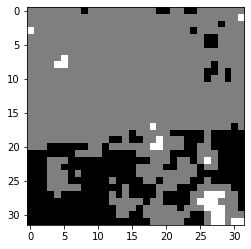

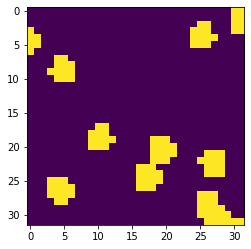

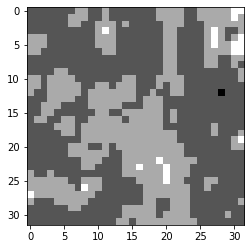

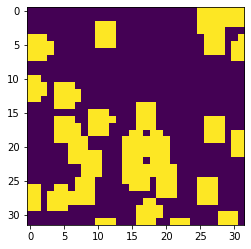

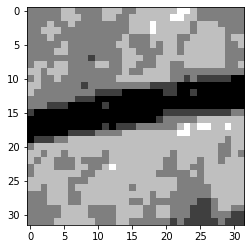

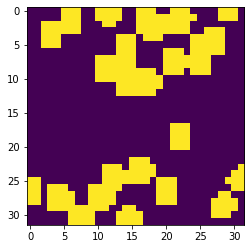

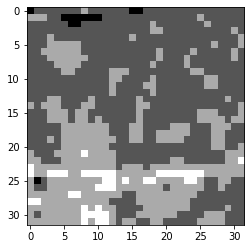

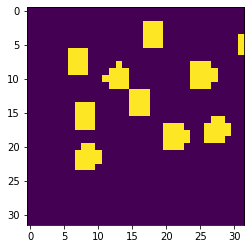

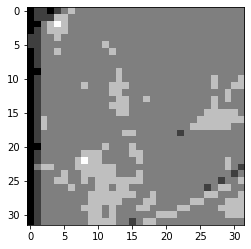

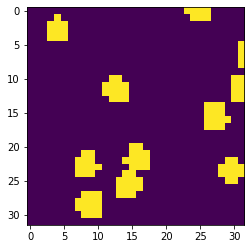

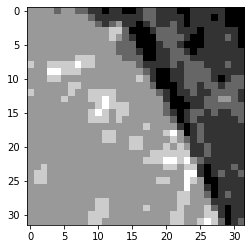

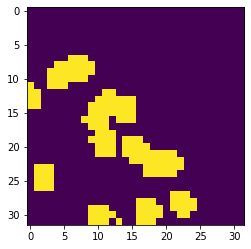

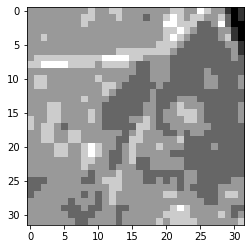

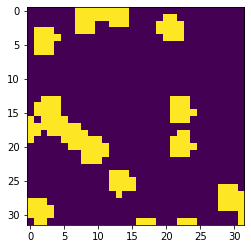

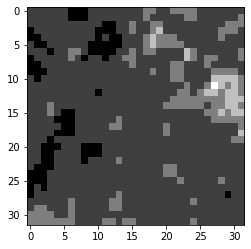

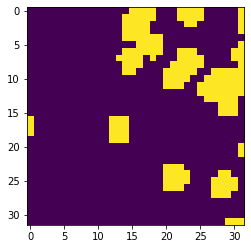

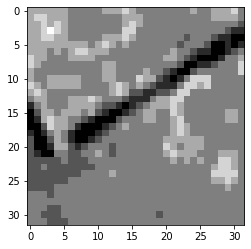

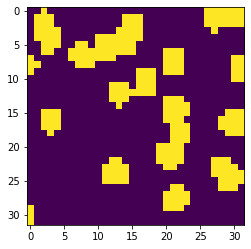

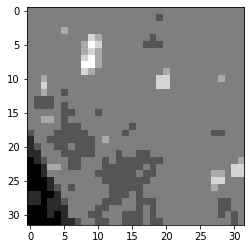

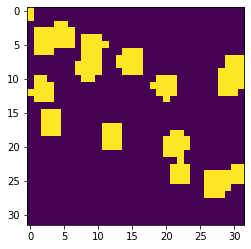

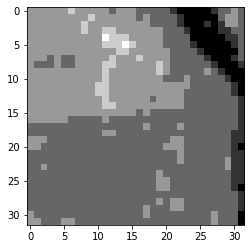

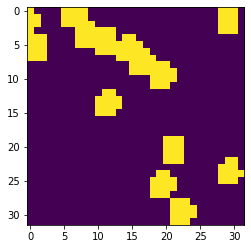

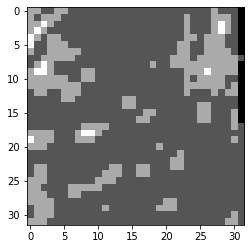

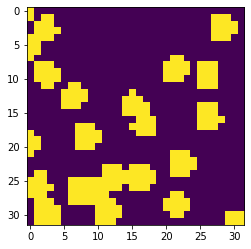

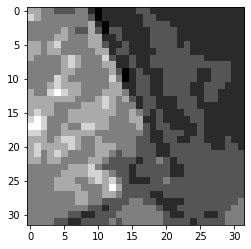

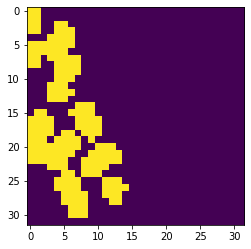

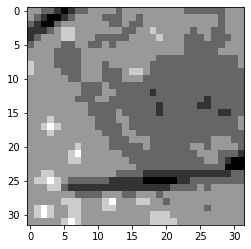

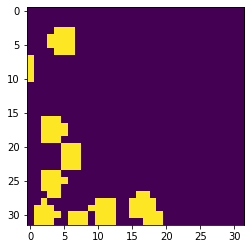

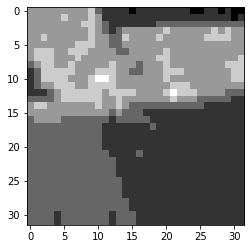

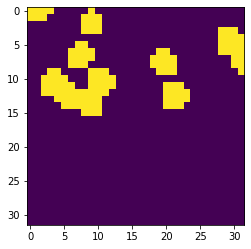

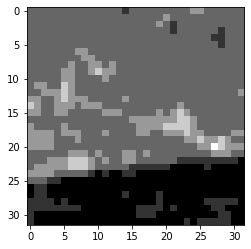

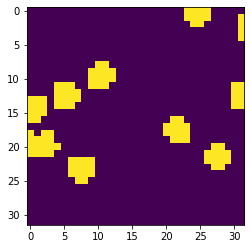

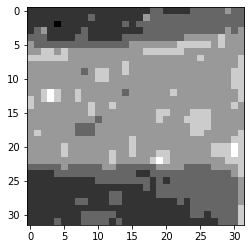

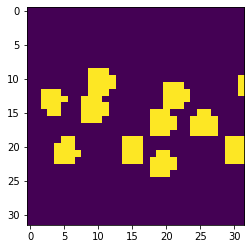

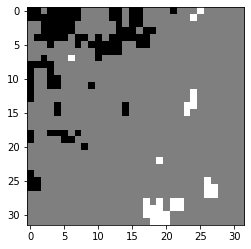

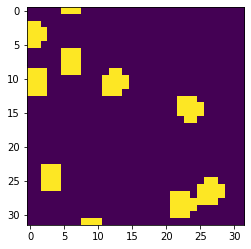

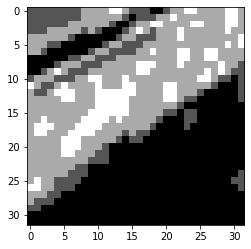

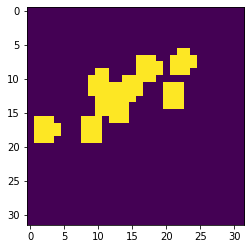

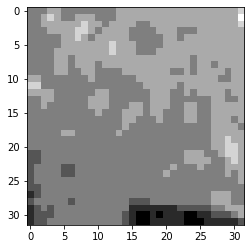

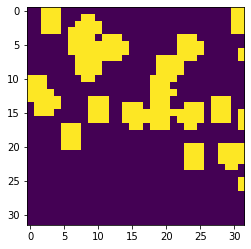

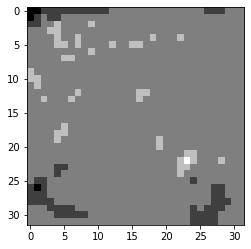

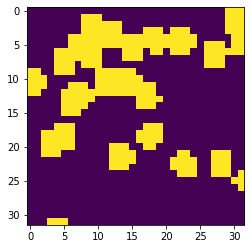

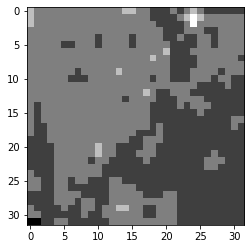

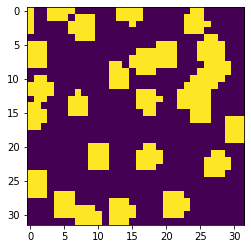

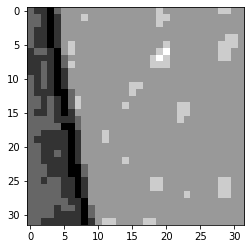

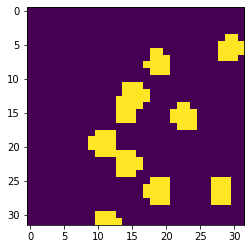

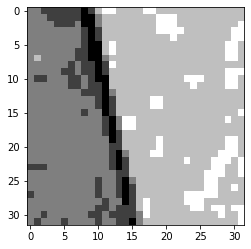

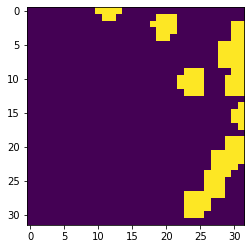

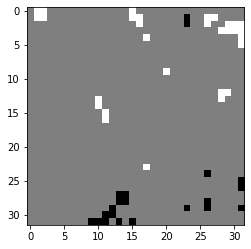

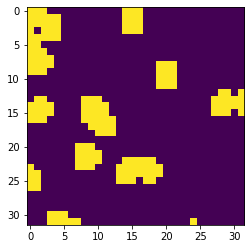

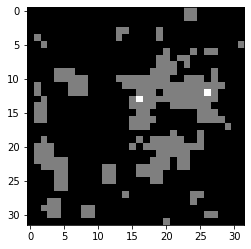

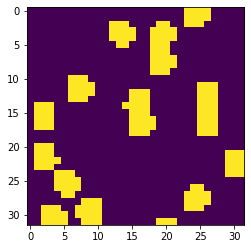

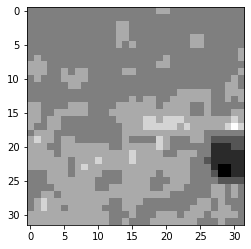

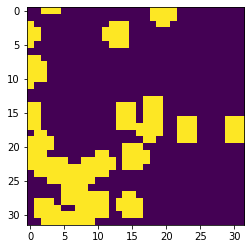

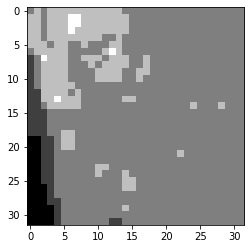

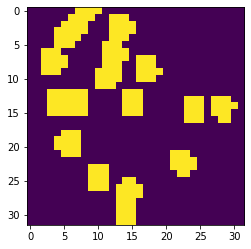

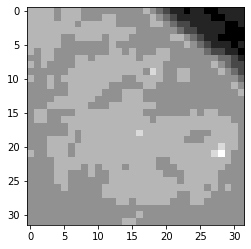

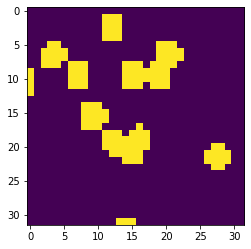

In [42]:
for i in range(495):
    img = cv2.imread(f"/home/popryho/explosion-crater-detection/dataset/train_02/images/00{i:03d}.tif")
    # You may need to convert the color.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    a = disparity_normalization(img)

    mask = cv2.imread(f"/home/popryho/explosion-crater-detection/dataset/train_02/masks/00{i:03d}.tif", 0)
    a = disparity_normalization(mask)
    

In [139]:
img = cv2.imread(f"/home/popryho/explosion-crater-detection/dataset/train/images/003c477d7c.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

msk = cv2.imread(f"/home/popryho/explosion-crater-detection/dataset/train/masks/003c477d7c.png", 0)

In [136]:
msk.min(), msk.max()

(0, 255)

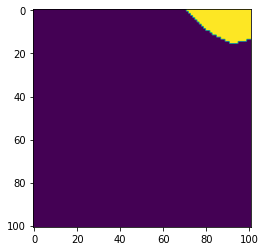

In [141]:
plt.imshow(msk)

In [147]:
image_path = "/home/popryho/explosion-crater-detection/data/data_part/S2B_tile_20220702_37UDQ_cut.tif"

data_set = gdal.Open(image_path)  
print(data_set.RasterCount)

4


In [151]:
img = data_set.ReadAsArray().transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


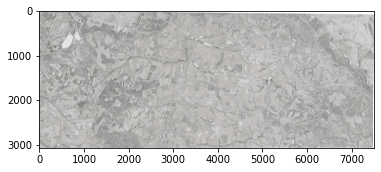

In [159]:
plt.imshow(img / 10000)